## Introduction - 0.1


<details>
  <summary>Introduction</summary>
  
  
  **From Data to Dialogue: Exploring Text Collections with Large Language Models via Retrieval Augmented Generation**

  **By Daniel Hutchinson (danielhutchinson@bac.edu)**


  **Introduction**

  Large language models (LLMs) and other forms of generative artifical intelligence (AI) offer historians new approaches to programmatically explore the past. At their best, LLMs can recall significant volumes of historical knowledge gleaned from the vast datasets on which they are trained - at least, that's what the [data seems to indicate.](https://dr-hutchinson-what-do-ais-know-about-history-app-i3l5jo.streamlit.app/) But these tools must be used with care. AI models may possess a broad knowledge base, but their reliability for more specialized historical topics is often limited. Of greatest concern, of course, is their propensity to deliver convincingly invented fiction as historical fact.
  
  A popular method to leverage the strengths of LLMs while mitigating their shortcomings is retrieval augmented generation (RAG). RAG is an approach that combines language generation models with information retrieval systems. This combination guides LLMs in providing contextually relevant responses informed by a specific database or text corpus.

  Here is an example of such an approach using the collected speeches of Abraham Lincoln. [GPT-4](https://openai.com/index/gpt-4/), a leading LLM from OpenAI, can offer significant details concerning Lincoln’s life and times. However, it struggles when posed a more specific and narrow question: “What did Abraham Lincoln think of Japan?”

  > **GPT-4**: Abraham Lincoln's presidency (1861-1865) coincided with a period when Japan was opening up to the Western world after centuries of relative isolation under the Tokugawa shogunate's "sakoku" (closed country) policy. However, there are no direct records of Lincoln expressing specific views on Japan. His presidency was largely consumed by the American Civil War and domestic issues, which were of paramount importance to his administration….

  Yet a less advanced model, [Mistral-7B](https://mistral.ai/news/announcing-mistral-7b/), provides a detailed response when when supplied relevant excerpts from Lincoln’s speeches through RAG:

> **Mistral-7B**: Abraham Lincoln's views on Japan were shaped by the diplomatic challenges and opportunities that arose during his presidency.

> In his Fourth Annual Message on December 6, 1864, Lincoln acknowledged the inconsistent and capricious nature of Japan's government and its performance of treaty obligations. Despite these challenges, he remained optimistic about the progress made through international cooperation and the positive impact of economic engagement on US-Japanese relations. He noted, "good progress has been effected by the western powers, moving with enlightened concert. Our own pecuniary claims have been allowed, or put in course of settlement, and the inland sea has been reopened to commerce. There is reason also to believe that these proceedings have increased rather than diminished the friendship of Japan towards the United States" [(Fourth Annual Message, December 6, 1864).](https://github.com/Dr-Hutchinson/nicolay/blob/main/data/individual_speeches_and_metadata/Text%20%23_%2072.txt)

> In his Second Annual Message on December 1, 1862, Lincoln mentioned Japan as one of the countries with which the US maintained favorable diplomatic and economic relations. He stated, "Very favorable relations also continue to be maintained with Turkey, Morocco, China and Japan" [(Second Annual Message, December 1, 1862).](https://github.com/Dr-Hutchinson/nicolay/blob/main/data/individual_speeches_and_metadata/Text%20%23_%2058.txt). This passage underscores the importance of Japan as a diplomatic and economic partner during this period.

> However, Lincoln also recognized the challenges posed by Japan's unique political structure and the resistance of the imperial court to Westernizing policies. In his Third Annual Message on December 8, 1863, he acknowledged the serious jeopardy that US-Japanese relations had faced due to the opposition of the Japanese aristocracy to the enlightened and liberal policies of the shogun. He asked for Congress's attention to the claim of the US minister in Japan for damages sustained in the destruction of the legation residence at Yedo [(Third Annual Message, December 8, 1863.)](https://github.com/Dr-Hutchinson/nicolay/blob/main/data/individual_speeches_and_metadata/Text%20%23_%2066.txt)

> Overall, Lincoln's speeches reveal a nuanced understanding of Japan and its role in international affairs during his presidency. While acknowledging the challenges posed by Japan's unique political structure and inconsistent adherence to treaty obligations, he remained committed to finding diplomatic solutions and maintaining economic engagement to strengthen US-Japanese relations.


  While GPT-4 is a superior model in terms of its training and "knowledge", the smaller model employing RAG provides an informed response supported by accurate quotes and specific citations drawn from the Lincoln corpus. More importantly, this response is supported by a chain of evidence that allows users to verify for themselves the validity of the AI response. While this approach does not eliminate the possibility of AI errors and “hallucinations,” this method enables the transformation of simple keyword searches into dialogues with data, an intriguing approach to historical inquiry.

  This lesson for the *Programming Historian* offers an overview of how RAG works and how historians can create their own personalized RAG applications. It is based on [*Nicolay: Exploring the Speeches of Abraham Lincoln with AI*](https://nicolay-honestabes-info.streamlit.app/), a digital history project utilizing a similar RAG approach.
  
  The lesson will cover the following elements:

  * How RAG works
  * Preparing datasets for RAG applications
  * Common RAG search methods
  * Prompting Large Language Models for RAG
  * Evaluating RAG
  * Advanced RAG: For Further Exploration


  **Suggested Prior Skills**

  Familiarity with Python is recommended for this lesson. Specifically, it would be beneficial to understand how to load and index files, set variables, employ external libraries, and manipulate text strings. The [*Programming Historian*](https://programminghistorian.org/en/lessons/?topic=python&sortType=difficulty&sortOrder=desc) offers a variety of helpful lessons on these Python approaches.
  
  This lesson also assumes familiarity with Jupyter Notebooks. If you are unfamiliar with this format, you may find the [Introduction to Jupyter Notebooks](https://programminghistorian.org/en/lessons/jupyter-notebooks) lesson a valuable resource.
  
  Readers are particularly encouraged to use a Notebook enabled for cloud-based GPU access, like the [Google Colab](https://colab.google/) environment, which offers users free access to processors needed for execution of some elements of this notebook. [The Computer Vision for the Humanities (Part 1)](https://programminghistorian.org/en/lessons/computer-vision-deep-learning-pt1) lesson offers a guide for getting started with Colab.
</details>


## How RAG Works - 0.2

<details>
  <summary>How RAG Works </summary>
  
  ![Naive RAG Example](https://raw.githubusercontent.com/Dr-Hutchinson/programming_historian/main/media/naive_rag_image.png)

  From: Gao et. al, "Retrieval-Augmented Generation for Large Language Models: A Survey." arXiv:2312.10997v4  [cs.CL]  5 Jan 2024. [https://arxiv.org/pdf/2312.10997](https://arxiv.org/pdf/2312.10997)


  Retrieval augmented generation was [first introduced](https://arxiv.org/abs/2005.11401) in 2020, and has developed into an active research area with the rising interest in generative AI. While RAG apps vary in complexity and scale, every RAG application utilizes some form of the following features: data indexing, a retreiver, and a large language model.  

  **Data Indexing:** Data indexing is the foundational step in the RAG process. This process involves organizing and storing data in a way that allows for efficient retrieval, transforming a dataset into a knowledge base for the application. This is accomplished by programtically segmenting and indexing the data for search and retrieval.

  **Retriever:** Retrievers are used to search over a dataset. When given a user query, retrievers seek out data that mostly closely matches the query. Retrievers are modular elements, and different search methods can be implemented based on user preference. Keyword matching using methods typical of standard search engines, for example, is a common search approach. However, keyword search alone can fail to capture documents with similar meanings but employing different termininology. Accordingly, RAG applications typically utilize hybrid search approaches to capture these nuances. Methods such as [text embedding](https://programminghistorian.org/en/lessons/understanding-creating-word-embeddings) enables capacities for semantic and contextual search approaches, broadening the retriever's scope while also enhancing its precision. Using these approaches, the retriever captures the top ranked results to pass on to a LLM to interpret.

  **Large Language Model (LLM):** An LLM is the final component of a RAG system. LLMs are trained on vast corporea of text data, enabling them to imitiate forms of human understanding and generate text and working code. Their training gives them considerable recall in a vast array of domains. Yet they also are prone to invent information or make errenous claims. By integrating a retriever, an LLM can enhance its responses with specific, contextually relevant information from the indexed dataset. Its responses can be further improved by the use of prompts containing example RAG tasks, allowing the LLM to utilize its capaciites for in-context learning. This combination leverages the broad knowledge and language capabilities of the LLM while grounding its responses from a specific dataset.
  
</details>


## Developing a RAG App: Things to Consider - 0.3

<details>
  <summary>Developing a RAG App: Things to Consider </summary>

  In exploring RAG techniques, historians should first consider their use case, their data, and the costs and technical knowledge needed to implement a RAG app. Careful consideration of these factors at the onset will save time and expense later.

The easiest path is to utilize RAG as a service, where data is uploaded to a cloud for retrieval and interpretation by closed-source models. Weviate’s [Verba](https://github.com/weaviate/Verba) service, for example, offers a technically accessible platform for utilizing a wide array of RAG-approaches and API access to most advanced LLMs.

However, open source approaches offer an important alternative to RAG as a service. While proprietary models offered by firms like OpenAI, Google, and Anthropic offer state-of-the-art performance, the expense of using them can scale quickly. Open-source LLMs offer a no-cost, locally hosted alternative. Moreover, technical advances are improving the performance of open-source models, making them increasingly competitive. Perhaps most importantly, open source methods open up the possibility to develop customizable RAG frameworks tailored to specific research tasks.

To be sure, there are challenges in utilizing open source approaches. Running local models often requires access to high-powered GPU processors or external hosting services, which bear their own costs. However, services like Google Colabs have enabled significant access to cloud-based GPU computing power.

In considering these different options, consider what elements from the chart below best fit with your use needs:

  
  | **Criteria**                | **Open Source Models**                                                                                                                                                          | **Closed Source Models**                                                                                                                                                      |
  |-----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
  | **Ease of Use**             | - Requires more technical setup and maintenance.<br>- May have a steeper learning curve.                                                                                        | - Generally easier to set up and use.<br>- User-friendly interfaces.<br>- Extensive support and documentation.                                                                |
  | **Technical Accessibility** | - Requires technical knowledge for installation and configuration.<br>- Community support might be fragmented.                                                                  | - Lower technical barrier to entry.<br>- Comprehensive support services.<br>- Accessible for users with minimal technical background.                                          |
  | **Cost**                    | - No cost for the models themselves.<br>- Costs associated with local hardware or cloud-based compute resources.                                                                 | - Can be expensive, especially with high usage.<br>- Subscription or pay-per-use models.<br>- Potentially high long-term costs.                                                |
  | **Performance**             | - Performance improving with advances in open-source technology.<br>- May require optimization to match closed-source performance.                                               | - Access to the latest and most advanced LLMs.<br>- Typically offers higher out-of-the-box performance.                                                                       |
  | **Customizability**         | - Highly customizable.<br>- Ability to tailor the model and RAG framework to specific research needs.<br>- Open-source code can be modified.                                      | - Limited customization options.<br>- Customizability may be constrained by the service provider.<br>- Rely on provider for updates and improvements.                          |
  | **Compute Requirements**    | - Requires significant local compute power or cloud-based GPU resources.<br>- Can be managed with services like Google Colab.                                                     | - Compute resources managed by the service provider.<br>- No need for local high-powered hardware.<br>- Simplifies the compute aspect for end-users.                          |
  | **Security and Privacy**    | - Greater control over data security and privacy.<br>- Data remains local or under user-defined control.                                                                         | - Data is uploaded to and managed by the service provider.<br>- Trust in the provider’s security measures is essential.                                                        |
  | **Scalability**             | - Scalability depends on local resources or cloud infrastructure.<br>- More flexible but potentially more complex to scale.                                                      | - Easily scalable with the provider’s infrastructure.<br>- Provider handles the complexities of scaling.<br>- Suitable for rapidly growing or variable usage needs.           |
  | **Community and Support**   | - Strong community support, but may vary in reliability.<br>- Open forums and collaborative problem-solving.                                                                     | - Professional support services.<br>- Guaranteed response times.<br>- Access to detailed documentation and troubleshooting guides.                                              |
  | **Innovation and Updates**  | - Continuous innovation from the open-source community.<br>- Updates and improvements depend on community contributions and developer engagement.                                | - Regular updates from the provider.<br>- Access to the latest technological advancements.<br>- Innovations driven by industry leaders in AI and machine learning.             |

 A final element to consider are specialized frameworks for RAG programming. Python libraries for LLMs such as [Langchain](https://github.com/langchain-ai/langchain), [Llamaindex](https://github.com/run-llama/llama_index), and [txtai](https://github.com/neuml/txtai) feature tutorials and Juptyer Notebooks for building different RAG approaches and LLM applications.

</details>


## Preparing Datasets for RAG - 0.4

<details>
  <summary>Indexing Datasets</summary>
  
  RAG systems work best when tailored to the specific data on which they are queried. An important first step is indexing your data for effective recall and interpretation. One crucial element is addressing the “context windows” of LLMs, or the limit of the textual information the model can process in a single inference. While some models possess expansive windows that can take in entire datasets in a single query, many models remain limited to a few pages of text.

  Text chunking, or splitting large text collections into smaller individual segments, is a common workaround to this limitation. For example, the data used in this lesson comes from a corpus of Lincoln speeches held by the [University of Virginia’s Miller Center](https://data.millercenter.org./). This collection of fifteen Lincoln speeches totals some 96,000 words, or some 300 pages of text, too large for most open-source models. Accordingly, the corpus has been broken down into 79 individual chunks formatted into a [JSON file](https://github.com/Dr-Hutchinson/nicolay/blob/main/data/lincoln_speech_corpus.json). A good way to observe this process is by exploring [ChunkViz](https://example.com), a web tool for visualizing how text splitters chunk a text based on different settings. A number of LLM programming frameworks can automate this chunking process across a variety of data formats and programming languages. Frameworks such as [Langchain](https://python.langchain.com/v0.2/docs/how_to/#text-splitters), [Llamaindex](https://docs.llamaindex.ai/en/stable/api_reference/node_parsers/token_text_splitter/), and [txtai](https://github.com/neuml/txtai/blob/master/examples/10_Extract_text_from_documents.ipynb) offer text splitters/chunkers for effective data indexing.

  Another approach to preparing datasets for RAG is the inclusion of metadata accompanying each text segment. Metadata can provide additional details to aid search-and-retrieval and provide context for the LLM’s interpretations. If such metadata is unavailable, one approach is to programmatically generate metadata using an LLM. For example, this [prompt](https://github.com/Dr-Hutchinson/programming_historian/blob/main/prompts/metadata_generation_prompt.txt) demonstrates how this method was used on the Lincoln corpus to generate summaries and extract keywords from each chunk. This metadata is then paired with the Lincoln corpus to facilitate retrieval and interpretation.

  The code below demonstrates how to download and view the data structure of Lincoln corpus. Only the 'full_text' and 'source' variables are originally part of the Lincoln corpus; the 'summary' and 'keywords' variables were programtically created with LLMs and later added.
  
</details>


In [ ]:
# @title Downloading Lincoln corpus - 0.5

import re
import os
import json
import requests
import pandas as pd

def download_data(url, file_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print('File downloaded successfully!')
    else:
        print(f'Failed to download file. Status code: {response.status_code}')

# Data and File Paths
url = "https://raw.githubusercontent.com/Dr-Hutchinson/nicolay/main/data/lincoln_speech_corpus.json"
data_dir = "/content/"
file_name = "lincoln_speech_corpus.json"
file_path = os.path.join(data_dir, file_name)

# Downloading Lincoln speech corpus
download_data(url, file_path)

# Reading and displaying the first entry in the JSON file
with open(file_path, 'r') as file:
    data = json.load(file)

# Displaying the first entry
if data:
    first_entry = data[0]
    print("First entry in the JSON file:")
    print(json.dumps(first_entry, indent=4))
else:
    print("The JSON file is empty or not properly formatted.")


File downloaded successfully!
First entry in the JSON file:
{
    "text_id": "Text #: 0",
    "source": "Source:  At Peoria, Illinois. October 16, 1854.",
    "full_text": "\"The repeal of the Missouri Compromise, and the propriety of its restoration, constitute the subject of what I am about to say.\n\nAs I desire to present my own connected view of this subject, my remarks will not be, specifically, an answer to Judge Douglas; yet, as I proceed, the main points he has presented will arise, and will receive such respectful attention as I may be able to give them.\n\nI wish further to say, that I do not propose to question the patriotism, or to assail the motives of any man, or class of men; but rather to strictly confine myself to the naked merits of the question.\n\nI also wish to be no less than National in all the positions I may take; and whenever I take ground which others have thought, or may think, narrow, sectional and dangerous to the Union, I hope to give a reason, which wil

## Common RAG Search Methods - 1.0

<details>
  <summary>Common RAG Search Methods </summary>

   ![Open RAG Flowchart](https://raw.githubusercontent.com/Dr-Hutchinson/programming_historian/main/media/Open%20Rag%20Diagram_1.png)

Building a retriever, or a set of search methods, is the next step after data indexing. In these examples we explore searcch approaches commonly used in RAG applications, and then combine them to search the Lincoln corpus.  In the code below we will construct a retriever system employing four types of retrieval tools:

1. **Keyword search (using BM25)**
2. **Text Embeddings for Semantic Similarity (using Qdrant)**
3. **Text Embeddings for Contextual Similarity (using ColBERT)**
4. **Search Result Reranker (BGE-Base)**

You can follow along and replicate these steps with this Google Colab notebook, which enables remote access to a GPU needed to run the code.

To begin, let’s download and import the libraries needed for the RAG app. Please note that some of the these libraries are sizable, and may take some time to download and install (approximately five to ten minutes).



In [ ]:
# @title Installing dependencies - 1.1

# Install the packages needing specific versions to avoid conflicts
!pip install -U pyarrow==14.0.2 requests==2.31.0 packaging==24.1

# Then install the rest of the dependencies
!pip install langchain_community tiktoken langchain-openai langchainhub chromadb langchain youtube-transcript-api pytube
!pip install jq
!pip install -U ragatouille
!pip install -U FlagEmbedding
!pip install -U transformers
!pip install qdrant-client>=1.1.1
!pip install -U sentence-transformers
!pip install nltk
!pip install ctransformers>=0.2.27
!pip install -q -U accelerate
!pip install -q -U bitsandbytes
!pip install secure-smtplib
!pip install rank-bm25
!pip install rouge-score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.6/983.6 kB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.1/366.1 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

Next, let’s ensure access to [HuggingFace](https://huggingface.co/), an online repository of downloadable open-source models that we’ll be using to construct this RAG application. The code below sets up API access to HuggingFace; you can sign up for an API key [here](https://huggingface.co/docs/api-inference/en/quicktour#get-your-api-token). While HuggingFace does offer paid tiers for some services, all of the models used in this lesson are free to use and download.

In [ ]:
# @title Setting HuggingFace API key - 1.2
from huggingface_hub import login

# Set you API key here
hf_token = "hf_"

# Login to Hugging Face
login(hf_token)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## Keyword Search (with BM25) - 1.3

<details>
  <summary>Keyword Search (with BM25)</summary>

  [BM25](https://github.com/dorianbrown/rank_bm25), short for "Best Matching 25", is a Python library which uses a set of ranking functions to estimate the relevance of documents to a given query. BM25 ranks documents based on the occurrence of query terms within each document. This approach is  computationally efficient and relatively easy to implement. However, BM25 relies on exact term matching, and may miss relevant documents that use different terms to express similar concepts. That said, it offers a good baseline for initial searches.

  The code below demonstrates how this search method is implemented:

  **1. Library Imports and Setup:**

  Imports necessary libraries: The code imports libraries for BM25 (rank_bm25), sentence encoding (SentenceTransformer), text processing (nltk), and data loading (langchain_community).
  
  **2. Initialize Sentence Encoder:**
  
  Sets up a Sentence Transformer model downloaded from HuggingFace to encode sentences in the Lincoln corpus.
  
  **3. Download and Prepare NLTK Resources:**

  Download required [Natural Language Toolkit](https://www.nltk.org/) (NLTK) resources: The code downloads the 'punkt' and 'stopwords' datasets, which are needed for tokenizing text and filtering out common stopwords (e.g., "the," "and," "is").
  
  **4. Define Metadata Extraction and Preprocessing Functions:**

  Extract Metadata: The extract_metadata_for_bm25 function extracts relevant metadata from each document, such as text ID, full text, summary, and keywords.
  
  Preprocess Text: The code defines a preprocessing function that tokenizes the text, converts it to lowercase, and removes stopwords, preparing it for BM25 indexing.
  
  **5. Load and Encode Documents:**

  Load Documents: The load_and_encode_documents_bm25 function loads the Lincoln speech corpus from a JSON file using [Langchain's JSONLoader.](https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/json/)
  
  Encode Texts for BM25: The function preprocesses each document and creates a BM25 index of the corpus for keyword search. Notably, for this code we include not just the full text of each Lincoln speech, but also the accompanying metadata such as summaries and keyword lists.
  
  **6. Perform Keyword Search with BM25:**

  Keyword Search Function: The keyword_search_bm25 function takes a query, processes it, and calculates BM25 scores for each document in the corpus based on the query.
  
  **7. Find Best Key Quote:**
  
  The find_best_key_quote function identifies the most relevant passage in each document that matches the query terms.
  
  **8. Return Search Results:**

  Compile Results: The keyword search function compiles the top matching documents into a Pandas DataFrame, including details like document ID, source, summary, keywords, BM25 score, and the most relevant quote from each document.

In [ ]:
# @title Keyword Search: Download model & encode corpus - 1.4

# Import necessary libraries for BM25, text processing, and data loading
from rank_bm25 import BM25Okapi
from sentence_transformers import SentenceTransformer
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from langchain_community.document_loaders import JSONLoader

# Initialize Sentence Transformer Encoder for potential later use
encoder_name = "all-MiniLM-L6-v2"
encoder = SentenceTransformer(encoder_name)

# Download necessary NLTK resources for text tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words (common words that are usually filtered out in searches)
stop_words = set(stopwords.words('english'))

# Function to extract metadata from each document for BM25 indexing
def extract_metadata_for_bm25(record, metadata=None):
    if metadata is None:
        metadata = {}
    text_id = record.get("text_id", "N/A")  # Extract text ID
    full_text = record.get('full_text', "N/A")  # Extract full text of the document
    summary = record.get("summary", "N/A")  # Extract summary
    keywords = record.get("keywords", "N/A").replace("Keywords: ", "").split(", ")  # Extract and process keywords

    # Combine full text, summary, and keywords for BM25 indexing
    combined_text = f"{full_text} {summary} {' '.join(keywords)}"
    metadata.update({
        "Document ID": text_id,
        "full_text": combined_text,
        "source": record.get("source", "N/A"),  # Extract source information
        "summary": summary,
        "keywords": keywords
    })
    return metadata

# Function to load documents from a JSON file and preprocess them for BM25 indexing
def load_and_encode_documents_bm25(file_path):
    # Load documents using JSONLoader
    loader = JSONLoader(file_path, jq_schema='.[]', content_key="full_text", metadata_func=extract_metadata_for_bm25)
    docs = loader.load()
    bm25_texts = [doc.metadata['full_text'] for doc in docs]  # Extract full texts for BM25 processing

    # Preprocess text by tokenizing, converting to lowercase, and removing stop words
    def preprocess(text):
        tokens = word_tokenize(text.lower())
        return [token for token in tokens if token not in stop_words]

    # Initialize BM25 with preprocessed texts
    bm25 = BM25Okapi([preprocess(text) for text in bm25_texts])
    return docs, bm25

# Load and encode documents for BM25 keyword search
docs_bm25, bm25 = load_and_encode_documents_bm25(file_path)

# Function to perform a BM25 keyword search on the document corpus
def keyword_search_bm25(bm25, query, docs, encoder, limit):
    # Preprocess query by tokenizing and filtering out stop words
    tokenized_query = word_tokenize(query.lower())
    filtered_query = [word for word in tokenized_query if word not in stop_words]

    # Get BM25 scores for each document based on the query
    bm25_scores = bm25.get_scores(filtered_query)
    sorted_indices = sorted(range(len(bm25_scores)), key=lambda i: -bm25_scores[i])

    results = []

    # Collect top matching documents based on BM25 scores
    for idx in sorted_indices[:limit]:
        doc = docs[idx]
        key_quote = find_best_key_quote(doc.metadata['full_text'], query)  # Find best matching quote in the document
        results.append({
            'Query': query,
            'Document ID': doc.metadata['Document ID'],
            'Key Quote': key_quote,
            'Source': doc.metadata.get('source', 'N/A'),
            'Summary': doc.metadata.get('summary', 'N/A'),
            'Keywords': ', '.join(doc.metadata.get('keywords', [])),
            'BM25 Score': bm25_scores[idx],
            'Model': 'BM25'
        })

    return pd.DataFrame(results)

# Function to find the best matching quote in a document based on the query
def find_best_key_quote(full_text, query):
    query_terms = set([word.lower() for word in word_tokenize(query) if word not in stop_words])

    # Find all matches of the query terms in the full text
    pattern = re.compile(r'\b(?:' + '|'.join(re.escape(term) for term in query_terms) + r')\b', re.IGNORECASE)
    matches = [(m.start(), m.end()) for m in pattern.finditer(full_text)]

    if not matches:
        return full_text[:500]  # Fallback to the first 500 characters if no matches are found

    # Split text into sentences
    sentences = sent_tokenize(full_text)
    sentence_indices = [i for i, sentence in enumerate(sentences) if pattern.search(sentence)]

    if not sentence_indices:
        return full_text[:500]  # Fallback to the first 500 characters if no matching sentence is found

    best_index = sentence_indices[0]

    # Select two sentences before and after the matched sentence
    start_index = max(best_index - 2, 0)
    end_index = min(best_index + 3, len(sentences))

    best_window = ' '.join(sentences[start_index:end_index])

    return best_window

# Encoding Lincoln corpus and metadata for keyword search with BM25
docs_bm25, bm25 = load_and_encode_documents_bm25(file_path)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


With keyword search with BM25 now enabled, let's see it at work with this query:

In [ ]:
# @title Keyword Search: Set Query - 1.5

query = "How did Lincoln regard Japan?"

Previous exploration reveals that Japan is mentioned exactly three times in the Miller Center corpus, in Lincoln's Annual Messages to Congress in 1862, 1863, and 1864.

In [ ]:
# @title Keyword Search: Corpus Search - 1.6

from IPython.display import display, HTML

# Function to highlight specific keywords in text
def highlight_keywords(text, keywords):
    escaped_keywords = [re.escape(keyword.strip()) for keyword in keywords]
    highlighted_text = text

    for keyword in escaped_keywords:
        keyword_pattern = re.compile(r'\b' + keyword + r'\b', re.IGNORECASE)
        highlighted_text = keyword_pattern.sub(r'<mark>\g<0></mark>', highlighted_text)

    return highlighted_text

bm25_results_df = keyword_search_bm25(bm25, query, docs_bm25, encoder, limit=5)


# Define the keywords to highlight
keywords_to_highlight = ["Lincoln", "regard", "Japan"]

# Apply the highlight_keywords function to Key Quote and Summary columns
bm25_results_df['Key Quote'] = bm25_results_df['Key Quote'].apply(lambda x: highlight_keywords(x, keywords_to_highlight))
bm25_results_df['Summary'] = bm25_results_df['Summary'].apply(lambda x: highlight_keywords(x, keywords_to_highlight))

# Apply the highlight_keywords function to the Keywords column with the same specified keywords
bm25_results_df['Keywords'] = bm25_results_df['Keywords'].apply(lambda x: highlight_keywords(x, keywords_to_highlight))

# Display the final DataFrame as HTML
bm25_results_html = bm25_results_df.head().to_html(escape=False)
display(HTML(bm25_results_html))

,Query,Document ID,Key Quote,Source,Summary,Keywords,BM25 Score,Model
0,How did Lincoln regard Japan?,Text #: 72,"The judicial consular establishment there has become very difficult and onerous, and it will need legislative revision to adapt it to the extension of our commerce, and to the more intimate intercourse which has been instituted with the government and people of that vast empire. China seems to be accepting with hearty good-will the conventional laws which regulate commercial and social intercourse among the western nations. Owing to the peculiar situation of Japan, and the anomalous form of its government, the action of that empire in performing treaty stipulations is inconstant and capricious. Nevertheless, good progress has been effected by the western powers, moving with enlightened concert. Our own pecuniary claims have been allowed, or put in course of settlement, and the inland sea has been reopened to commerce.","Source: Fourth Annual Message. December 6, 1864.","Summary: In Abraham Lincoln's Fourth Annual Message, he expresses gratitude for good health and abundant harvests. He discusses the United States' foreign relations, including maintaining neutrality in Mexico's civil war and involvement in various projects such as a river survey in Central America and the overland telegraph between America and Europe. He mentions the friendly relations with South American states, the ongoing civil war in the Spanish part of San Domingo, and the improvement in relations with Liberia. Lincoln also discusses the situation in China, where rebellion has been suppressed, and Japan, where progress has been made in performing treaty stipulations.","Fourth Annual Message, December 6, 1864, Abraham Lincoln, foreign relations, Mexico, civil war, Central America, river survey, overland telegraph, South American states, San Domingo, Liberia, China, Japan, treaty stipulations.",6.996904,BM25
1,How did Lincoln regard Japan?,Text #: 66,"""In common with other western powers, our relations with Japan have been brought into serious jeopardy, through the perverse opposition of the hereditary aristocracy of the empire, to the enlightened and liberal policy of the Tycoon designed to bring the country into the society of nations. It is hoped, although not with entire confidence, that these difficulties may be peacefully overcome. I ask your attention to the claim of the Minister residing there for the damages he sustained in the destruction by fire of the residence of the legation at Yedo.","Source: Third Annual Message. December 8, 1863.","Summary: In his Third Annual Message, President Abraham Lincoln discusses issues with Japan, improvements in the consular system, and the importance of international telegraph connections. He expresses satisfaction with the condition of organized Territories and the mineral resources they hold. He highlights the need for a system to encourage immigration and addresses the potential need for a special court to handle claims arising from injuries to foreign citizens. The President also mentions the taxation of foreign consuls' incomes and the successful operations of the Treasury, including the national banking law.","Third Annual Message, December 8, 1863, Abraham Lincoln, Japan, consular system, international telegraph, Atlantic ocean, organized Territories, mineral resources, immigration, foreign citizens, special court, taxation, foreign consuls, Treasury, national banking law.",6.767199,BM25
2,How did Lincoln regard Japan?,Text #: 58,"A considerable improvement of the national commerce is expected to result from these measures. Our relations with Great Britain, France, Spain, Portugal, Russia, Prussia, Denmark, Sweden, Austria, the Netherlands, Italy, Rome, and the other European states, remain undisturbed. Very favorable relations also continue to be maintained with Turkey, Morocco, China and Japan. During the last year there has not only been no change of our previous relations with the independe

As the search results demonstrate, we see the three Annual Messages displayed, with the mentions of 'Japan' highlighted in yellow in the 'Key Quote', 'Summary', and 'Keywords' columns. Other terms in the query, such as 'Lincoln' and 'regard', are also highlighted, demonstrating how extraenous terms in a search can create noise and potentially crowd out relevant matches.

While keyword search is effective for many types of queries, adding additional methods will make the Retriever more robust. In the next section we'll explore is semantic search with text embeddings.

## Semantic Search (with Qdrant) - 1.7

<details>
  <summary>Semantic Search (with Qdrant))</summary>

Semantic search aims to improve search relevance by understanding the meaning of words and phrases rather than relying solely on keyword matching. For this, we use text embeddings, which transforms text into numerical vectors that capture semantic meaning.

For this lesson we are using ['all-MiniLM-L6-v2'](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) model, which is an open-source, lightweight embedding model from the [Sentence Transformer](https://sbert.net/) library. [Qdrant](https://github.com/qdrant/qdrant) is a framework for locally using this model to convert text to embeddings and store them in a vector database for querying. As interest in RAG and LLMs have expanded, intense competition has emerged between services offering text embedding and semantic search. [This leaderboard](https://huggingface.co/spaces/mteb/leaderboard) from HuggingFace offers a quick rundown of leading embedding models.

The code below demonstrates how the semantic search process is implemented:

**1. Download and Prepare Qdrant and Sentence Transformer:**

This section installs and import necessary libraries for semantic search. Qdrant is a vector similarity search engine that we use to store and query text embeddings. Sentence Transformers from HuggingFace provide pre-trained models to create these embeddings.

**2. Define Custom Stopwords:**

Custom stopwords are defined to remove common but irrelevant words from queries, ensuring better focus on meaningful terms. The term "Lincoln" has been excluded here, as its presence was found to distort search results. Repeated testing over known texts/queries can help determine whether particular search terms should be excluded.

**3. Metadata Extraction and Document Encoding:**

Metadata is extracted for each document and encoded. Unlike in keyword search, for this approach we will only include the full text of the Lincoln corpus, but not the rest of the corpus metadata.

**4. Perform Semantic Search with Qdrant:**

Using Qdrant, we search for documents that are semantically similar to the query, using a process called cosine similarity.  

**5. Compile and Display Search Results:**

The search results include documents with their semantic scores, most relevant quotes, sources, summaries, and keywords. We also identify similar words within the documents to highlight how they relate to the query.

In [ ]:
# @title Semantic Search: Download model and encode corpus - 1.8
from qdrant_client import QdrantClient, models
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import pandas as pd
import re

# Parameters
collection_name = "lincoln_speeches"  # Name of the collection in Qdrant
encoder_name = "all-MiniLM-L6-v2"  # Name of the sentence transformer model
limit = 10  # Number of results to return

# Initialize Sentence Transformer Encoder
encoder = SentenceTransformer(encoder_name)

# Define custom stopwords including 'Lincoln'
custom_stopwords = set(stopwords.words('english')).union({"lincoln"})

# Function to preprocess the query by tokenizing and removing stopwords
def preprocess_query(query):
    """
    Preprocess the query by tokenizing, converting to lowercase, and removing stopwords.

    Args:
    query (str): The input query string.

    Returns:
    str: The preprocessed query.
    """
    tokens = word_tokenize(query.lower())
    filtered_tokens = [word for word in tokens if word not in custom_stopwords]
    return " ".join(filtered_tokens)

# Function to extract metadata from each document for Qdrant indexing
def extract_metadata_for_qdrant(record, metadata=None):
    """
    Extract metadata from a document for Qdrant indexing.

    Args:
    record (dict): The document record.
    metadata (dict, optional): An existing metadata dictionary to update. Defaults to None.

    Returns:
    dict: The updated metadata dictionary.
    """
    if metadata is None:
        metadata = {}
    text_id = record.get("text_id", "N/A")
    full_text = record.get("full_text", "N/A")
    source = record.get("source", "N/A")
    summary = record.get("summary", "N/A")
    keywords = record.get("keywords", "").replace("Keywords: ", "").split(", ")

    combined_text = f"{full_text} {' '.join(keywords)}"

    metadata.update({
        "Document ID": text_id,
        "combined_text": combined_text,
        "full_text": full_text,
        "source": source,
        "summary": summary,
        "keywords": keywords
    })

    return metadata

# Function to load and encode documents for Qdrant
def load_and_encode_documents_qdrant(file_path, collection_name, encoder_name):
    """
    Load documents from a JSON file, encode them using a sentence transformer, and upload to Qdrant.

    Args:
    file_path (str): Path to the JSON file containing the documents.
    collection_name (str): Name of the Qdrant collection.
    encoder_name (str): Name of the sentence transformer model.

    Returns:
    tuple: A tuple containing the list of documents and the Qdrant client instance.
    """
    encoder = SentenceTransformer(encoder_name)
    loader = JSONLoader(file_path, jq_schema='.[]', content_key="full_text", metadata_func=extract_metadata_for_qdrant)
    docs = loader.load()

    # Initialize Qdrant client with in-memory storage
    qdrant_client = QdrantClient(":memory:")
    qdrant_client.recreate_collection(
        collection_name=collection_name,
        vectors_config=models.VectorParams(
            size=encoder.get_sentence_embedding_dimension(),
            distance=models.Distance.COSINE
        )
    )

    # Prepare records for Qdrant
    records = [
        models.Record(
            id=idx,
            vector=encoder.encode(doc.metadata['combined_text']).tolist(),
            payload=doc.metadata
        ) for idx, doc in enumerate(docs)
    ]

    # Upload records to Qdrant
    qdrant_client.upload_records(collection_name=collection_name, records=records)

    return docs, qdrant_client

def vector_search_qdrant_with_similar_words(qdrant_client, collection_name, query_vector, query, limit):
    """
    Perform vector search with Qdrant and find similar words in the relevant sentences.

    Args:
    qdrant_client (QdrantClient): The Qdrant client instance.
    collection_name (str): Name of the Qdrant collection.
    query_vector (list): The query vector.
    query (str): The original query string.
    limit (int): Number of results to return.

    Returns:
    pd.DataFrame: DataFrame containing search results with additional metadata.
    """
    # Perform a vector search in Qdrant
    hits = qdrant_client.search(
        collection_name=collection_name,
        query_vector=query_vector.tolist(),
        limit=limit
    )

    results_df = pd.DataFrame(columns=[
        'Query', 'Document ID', 'Key Quote', 'Source', 'Summary', 'Keywords',
        'Semantic Score', 'Similar Words', 'Model'
    ])

    for hit in hits:
        full_text = hit.payload["full_text"]
        text_id = hit.payload["Document ID"]
        source = hit.payload.get("source", "N/A")
        summary = hit.payload.get("summary", "N/A")
        keywords = hit.payload.get("keywords", "")

        # Split the full text into sentences
        sentences = sent_tokenize(full_text)

        # Encode each sentence using the sentence transformer model
        sentence_embeddings = encoder.encode(sentences)

        # Calculate cosine similarity between the query vector and each sentence vector
        sentence_similarities = [1 - cosine(query_vector, sent_vec.tolist()) for sent_vec in sentence_embeddings]

        # Identify the index of the highest scoring sentence (most similar to the query)
        highest_scoring_sentence_idx = sentence_similarities.index(max(sentence_similarities))

        # Determine the number of sentences to include around the highest scoring sentence
        num_sentences_around = 3  # Number of sentences to include before and after the best match

        # Calculate the start and end indices for the sentences to include
        start_sentence_idx = max(0, highest_scoring_sentence_idx - num_sentences_around)
        end_sentence_idx = min(len(sentences), highest_scoring_sentence_idx + num_sentences_around + 1)

        # Extract the relevant sentences around the highest scoring sentence
        relevant_sentences = " ".join(sentences[start_sentence_idx:end_sentence_idx])

        # Extract words from the relevant sentences
        words = set(word_tokenize(relevant_sentences.lower()))

        # Encode each word in the relevant sentences
        word_embeddings = {word: encoder.encode([word])[0] for word in words}

        # Encode the query
        query_embedding = encoder.encode([query])[0]

        # Compute similarity between the query embedding and each word embedding
        similar_words = compute_similarity(word_embeddings, query_embedding)

        # Get the top 5 similar words with their similarity scores
        top_similar_words = similar_words[:5]

        new_row = {
            "Query": query,
            "Document ID": text_id,
            "Key Quote": relevant_sentences,
            "Source": source,
            "Summary": summary,
            "Keywords": ", ".join(keywords),
            "Semantic Score": max(sentence_similarities),
            "Similar Words": [(word, round(score, 4)) for word, score in top_similar_words],
            "Model": "Qdrant"
        }

        results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

    # Sort results by Semantic Score in descending order
    results_df.sort_values(by='Semantic Score', ascending=False, inplace=True)
    results_df.reset_index(drop=True, inplace=True)

    return results_df


# Function to compute similarity between word embeddings and query embedding
def compute_similarity(word_embeddings, query_embedding):
    """
    Compute similarity between word embeddings and query embedding.

    Args:
    word_embeddings (dict): Dictionary of word embeddings.
    query_embedding (list): The query embedding.

    Returns:
    list: List of tuples containing words and their similarity scores, sorted by similarity.
    """
    similarities = []
    for word, embedding in word_embeddings.items():
        similarity = 1 - cosine(query_embedding, embedding)
        similarities.append((word, similarity))
    return sorted(similarities, key=lambda x: -x[1])

# Load and encode documents for Qdrant
docs_qdrant, qdrant_client = load_and_encode_documents_qdrant(file_path, collection_name, encoder_name)


<ipython-input-7-3289dc99c121>:89: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  qdrant_client.recreate_collection(
<ipython-input-7-3289dc99c121>:107: DeprecationWarning: `upload_records` is deprecated, use `upload_points` instead
  qdrant_client.upload_records(collection_name=collection_name, records=records)


In [ ]:
# @title Semantic Search: Set Query - 1.9

query = "How did Lincoln use religious imagery?"

We'll now set a new query to demonstrate semantic search. This query would be difficult to achieve with keyword search, but with semantic search we can quickly survey how Lincoln utilized reliigous imagery in his speeches.

In [ ]:
# @title Semantic Search: Corpus Search - 1.10

# Functions for highlighting results

# Highlight Similar Words Function
def highlight_similar_words(text, similar_words):
    if not isinstance(text, str):
        return text  # If the input is not a string, return it as-is

    highlighted_text = text
    for word, similarity in similar_words:
        escaped_word = re.escape(word.strip())
        color = get_color(similarity)
        word_pattern = re.compile(r'\b' + escaped_word + r'\b', re.IGNORECASE)
        highlighted_text = word_pattern.sub(fr'<mark style="background-color: {color};">\g<0></mark>', highlighted_text)

    return highlighted_text


# Apply Highlighting Function
def apply_highlighting(df):
    if 'Key Quote' in df.columns and 'Similar Words' in df.columns:
        df['Key Quote'] = df.apply(lambda x: highlight_similar_words(x['Key Quote'], x['Similar Words']), axis=1)
    return df

def get_color(similarity):
    """Returns a color code based on the similarity score."""
    if similarity > 0.3:
        return '#F88379'  # Coral
    elif similarity > 0.25:
        return '#FA5F55'  # Orange Red
    elif similarity > 0.2:
        return '#ff7f00'  # Orange
    elif similarity > 0.15:
        return '#ffbf00'  # Amber
    else:
        return '#ffff00'  # Yellow


# Preprocess and encode the query to drop custom stopwords
preprocessed_query = preprocess_query(query)
query_vector = encoder.encode(preprocessed_query)

# Perform Qdrant search with similar words
qdrant_results_df = vector_search_qdrant_with_similar_words(qdrant_client, collection_name, query_vector, query, limit)

# Apply highlighting
qdrant_results_df = apply_highlighting(qdrant_results_df)

# Display the final DataFrame as HTML
qdrant_results_html = qdrant_results_df.head().to_html(escape=False)
display(HTML(qdrant_results_html))


,Query,Document ID,Key Quote,Source,Summary,Keywords,Semantic Score,Similar Words,Model
0,How did Lincoln use religious imagery?,Text #: 79,"Both read the same Bible, and pray to the same God; and each invokes His aid against the other. It may seem strange that any men should dare to ask a just God's assistance in wringing their bread from the sweat of other men's faces; but let us judge not that we be not judged. The prayers of both could not be answered; that of neither has been answered fully. The Almighty has His own purposes. ``Woe unto the world because of offences! for it must needs be that offences come; but woe to that man by whom the offence cometh!'' If we shall suppose that American Slavery is one of those offences which, in the providence of God, must needs come, but which, having continued through His appointed time, He now wills to remove, and that He gives to both North and South, this terrible war, as the woe due to those by whom the offence came, shall we discern therein any departure from those divine attributes which the believers in a Living God always ascribe to Him?","Source: Second Inaugural Address. March 4, 1865.","Summary: In his Second Inaugural Address, Abraham Lincoln reflects on the Civil War and the role of slavery in causing the conflict. He acknowledges the unexpected magnitude and duration of the war, and considers the possibility that it might be divine punishment for the offense of slavery. Despite the ongoing war, Lincoln urges the nation to continue with malice toward none and charity for all, and to work toward binding up the nation's wounds and achieving a lasting peace.","Second Inaugural Address, March 4, 1865, Abraham Lincoln, Civil War, slavery, divine judgment, magnitude, duration, malice, charity, healing, lasting peace.",0.407594,"[(slavery, 0.3058), (prayers, 0.2878), (believers, 0.2873), (bible, 0.2752), (south, 0.206)]",Qdrant
1,How did Lincoln use religious imagery?,Text #: 14,"""But NOW it is to be transformed into a sacred right.'' Nebraska brings it forth, places it on the high road to extension and perpetuity; and, with a pat on its back, says to it, Go, and God speed you.'' Henceforth it is to be the chief jewel of the nation---the very figure-head of the ship of State. Little by little, but steadily as man's march to the grave, we have been giving up the OLD for the NEW faith.","Source: At Peoria, Illinois. October 16, 1854.","Summary: In this excerpt, Abraham Lincoln criticizes the transformation of slavery into a ""sacred right"" and asserts that the principles of the Declaration of Independence and the Nebraska bill are incompatible. He calls for Americans to recognize the dangers of abandoning their founding principles and the potential harm to liberty. Lincoln advocates for returning to the principles and policies of the Declaration of Independence and saving the Union in a way that upholds its values. He also addresses Stephen Douglas's response to his previous speech, maintaining that the world will continue to believe that the Nebraska bill was intended to extend slavery.","Abraham Lincoln, Nebraska bill, slavery, Declaration of Independence, liberty, founding principles, Judge Douglas, Union, progress, antagonisms, moral right, legal rights, necessity, American values.",0.378523,"[(sacred, 0.3082), (faith, 0.2996), (nebraska, 0.2857), (figure-head, 0.1959), (god, 0.1914)]",Qdrant
2,How did Lincoln use religious imagery?,Text #: 55,"If you are, you should say so plainly. If you are not for force, nor yet for dissolution, there only remains some imaginable compromise. I do not believe any compromise, embracing the maintenance of the Union, is now possible. All I learn, leads to a directly opposite belief. The strength of the rebellion, is its military---its army. That army dominates all the country, and all the people, within its range. Any offer of terms made by any man or men within that range, in opposition to that army, is simply nothing for the present; beca

In the results above we can see the terms identified by Qdrant as possessing greatest semantic similaritiy. The different colors reflect the varying degree of semantic similariity with the query, offering a set of results utilizing terms as varied as "sacred", "belief", "faith", "prayers", "consecreated", "God", and "Bible".

In our final search method, we'll explore how to augment semantic search with contextual search using ColBERT.

## Contextual Search (with ColBERT) - 1.11

<details>
  <summary>Contextual Search (with ColBERT))</summary>

[ColBERT](https://github.com/stanford-futuredata/ColBERT) (Contextualized Late Interaction over BERT) is a retrieval model designed to enhance RAG applications by capturing the contextual relationships between query terms and document terms. Unlike traditional keyword matching or semantic search, ColBERT allows for a more nuanced understanding of context. For instance, in a historical document the term "state" could refer to a political entity or a condition of being. ColBERT can calculate the difference by analyzing surrounding words and phrases, offering more precise and granular search results. ColBERT also possesses multilingual capabilities, making it particularly attractive for diverse datasets.

For implementing ColBERT, we'll use the [RAGatouille](https://github.com/bclavie/ragatouille) library to load this model to implement RAG tasks. RAGatouille builds a custom index of the corpus for search and retrieval. The initial process of building an index takes some time (approximately five minutes for this corpus), but once the index has been created subsequent seaches run quite quickly, and the index can be saved for reuse.

The code below demonstrates how ColBERT is implemented with RAGatouille:

**1. Download and Prepare the Model and Data**
Install and import the necessary libraries. Custom functions are defined to preprocess the text and query, ensuring that common but irrelevant words (stopwords) are removed to improve the focus of the search.

**2. Metadata Extraction and Document Encoding**
The extract_metadata_for_colbert function extracts relevant metadata from each document and combines the full text, summary, and keywords for indexing. This is similar to the preprocessing steps for BM25 and Qdrant.

**3. Loading and Encoding Documents**
The documents are loaded and encoded using a Sentence Transformer model. This involves converting the text into high-dimensional vectors that capture semantic meaning.

**4. Setting Up ColBERT with RAGatouille**
RAGatouille is the library for using ColBERT, and simplifies the setup of ColBERT by providing utilities for training, fine-tuning, and indexing.

**5. Performing Contextual Search**
The rag_search_with_scores function performs a search using the ColBERT model. It preprocesses the query, retrieves the most relevant documents, and finds the best matching sentences within each document.




In [ ]:
# @title Contextual Search: Download model & load data - 1.12

# Import necessary libraries
from ragatouille import RAGPretrainedModel
from langchain_community.document_loaders import JSONLoader
from sentence_transformers import SentenceTransformer
import pandas as pd
import re


# Set parameters for ColBERT and the encoder
k = 10
index_name = "LincolnCorpus_1"
encoder_name = "all-MiniLM-L6-v2"
encoder = SentenceTransformer(encoder_name)

# Function to extract metadata from documents
def extract_metadata_for_colbert(record, metadata=None):
    """Extracts and combines metadata from a record for indexing."""
    if metadata is None:
        metadata = {}
    text_id = record.get("text_id", "N/A")
    full_text = record.get("full_text", "N/A")
    source = record.get("source", "N/A")
    summary = record.get("summary", "N/A")
    keywords = record.get("keywords", "N/A")
    keywords = keywords.replace("Keywords: ", "").split(", ")

    combined_text = f"{full_text} {summary} {' '.join(keywords)}"
    metadata.update({
        "Document ID": text_id,
        "full_text": full_text,
        "source": source,
        "summary": summary,
        "keywords": keywords,
        "combined_text": combined_text
    })
    return metadata

# Function to setup RAGatouille model and index documents
def setup_ragatouille(document_ids, document_texts, index_name, base_index_dir=".ragatouille/colbert/indexes"):
    """Sets up the RAGatouille model and indexes documents. If an index exists, loads it; otherwise, creates a new one."""
    path_to_index = os.path.join(base_index_dir, index_name)
    if os.path.exists(path_to_index):
        print(f"Loading existing RAGatouille index from: {path_to_index}")
        rag_model = RAGPretrainedModel.from_index(path_to_index)
    else:
        print(f"Creating new RAGatouille index at: {path_to_index}")
        os.makedirs(path_to_index, exist_ok=True)
        rag_model = RAGPretrainedModel.from_pretrained("colbert-ir/colbertv2.0")
        rag_model.index(
            collection=document_texts,
            document_ids=document_ids,
            index_name=index_name,
            max_document_length=90,
            split_documents=True
        )
    return rag_model, path_to_index

# Function to load and encode documents for ColBERT
def load_and_encode_documents_colbert(file_path):
    """Loads documents and encodes them using a sentence transformer model."""
    loader = JSONLoader(file_path, jq_schema='.[]', content_key="full_text", metadata_func=extract_metadata_for_colbert)
    docs = loader.load()
    document_ids = [doc.metadata['Document ID'] for doc in docs]
    document_texts = [doc.metadata['full_text'] for doc in docs]
    return docs, document_ids, document_texts

# Function to find the best matching quote and compute similarity scores
def find_best_key_quote_with_scores(full_text, query, encoder):
    """Finds the best matching quote in the text and computes similarity scores."""
    query_vector = encoder.encode([query])[0]
    sentences = sent_tokenize(full_text)
    sentence_embeddings = encoder.encode(sentences)
    sentence_similarities = [1 - cosine(query_vector, sent_vec) for sent_vec in sentence_embeddings]
    highest_scoring_sentence_idx = sentence_similarities.index(max(sentence_similarities))

    num_sentences_around = 3
    start_sentence_idx = max(0, highest_scoring_sentence_idx - num_sentences_around)
    end_sentence_idx = min(len(sentences), highest_scoring_sentence_idx + num_sentences_around + 1)
    best_window = ' '.join(sentences[start_sentence_idx:end_sentence_idx])

    return best_window, sentence_similarities, sentences

# Function to perform ColBERT search and score results
def rag_search_with_scores(rag_model, original_query, preprocessed_query, metadata_mapping, encoder, k=5):
    """Performs a ColBERT search and scores the results."""
    results = rag_model.search(query=preprocessed_query, k=k)
    seen_docs = set()
    augmented_results = []

    for result in results:
        doc_id = result['document_id']
        if doc_id in seen_docs:
            continue
        seen_docs.add(doc_id)

        metadata = metadata_mapping.get(doc_id, {})
        full_text = metadata.get('full_text', 'N/A')
        key_quote, sentence_similarities, sentences = find_best_key_quote_with_scores(full_text, preprocessed_query, encoder)

        augmented_result = {
            'Query': original_query,
            'Document ID': doc_id,
            'Key Quote': key_quote,
            'Source': metadata.get('source', 'N/A'),
            'Summary': metadata.get('summary', 'N/A'),
            'Keywords': metadata.get('keywords', 'N/A'),
            'ColBERT Score': result['score'],
            'Model': 'ColBERT',
            'Sentence Similarities': sentence_similarities,
            'Sentences': sentences
        }
        augmented_results.append(augmented_result)

    results_df = pd.DataFrame(augmented_results)
    return results_df

# Main Execution - Integrate ColBERT Search with Relevant Passage Extraction
docs_colbert, document_ids, document_texts = load_and_encode_documents_colbert(file_path)
metadata_mapping = {doc.metadata['Document ID']: doc.metadata for doc in docs_colbert}

rag_model, _ = setup_ragatouille(document_ids, document_texts, index_name)

Creating new RAGatouille index at: .ragatouille/colbert/indexes/LincolnCorpus_1


artifact.metadata:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

---- WARNING! You are using PLAID with an experimental replacement for FAISS for greater compatibility ----
This is a behaviour change from RAGatouille 0.8.0 onwards.
This works fine for most users and smallish datasets, but can be considerably slower than FAISS and could cause worse results in some situations.
If you're confident with FAISS working on your machine, pass use_faiss=True to revert to the FAISS-using behaviour.
--------------------


[Jul 13, 15:19:45] #> Note: Output directory .ragatouille/colbert/indexes/LincolnCorpus_1 already exists


[Jul 13, 15:19:48] [0] 		 #> Encoding 1389 passages..
[Jul 13, 15:19:50] [0] 		 avg_doclen_est = 64.28653717041016 	 len(local_sample) = 1,389
[Jul 13, 15:19:50] [0] 		 Creating 4,096 partitions.
[Jul 13, 15:19:50] [0] 		 *Estimated* 89,294 embeddings.
[Jul 13, 15:19:50] [0] 		 #> Saving the indexing plan to .ragatouille/colbert/indexes/LincolnCorpus_1/plan.json ..
used 20 iterations (2.0972s) to cluster 84830 items into 4096 clusters
[J

/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


[Jul 13, 15:21:33] Loading packbits_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


[0.038, 0.04, 0.043, 0.039, 0.04, 0.041, 0.039, 0.037, 0.038, 0.041, 0.037, 0.041, 0.039, 0.042, 0.039, 0.042, 0.035, 0.036, 0.038, 0.038, 0.04, 0.043, 0.038, 0.039, 0.036, 0.038, 0.042, 0.039, 0.04, 0.039, 0.041, 0.04, 0.042, 0.037, 0.039, 0.035, 0.039, 0.04, 0.039, 0.047, 0.041, 0.037, 0.04, 0.04, 0.039, 0.038, 0.038, 0.045, 0.042, 0.038, 0.039, 0.039, 0.041, 0.039, 0.038, 0.038, 0.045, 0.042, 0.046, 0.039, 0.037, 0.041, 0.04, 0.042, 0.041, 0.041, 0.042, 0.039, 0.035, 0.038, 0.042, 0.037, 0.039, 0.042, 0.039, 0.04, 0.041, 0.043, 0.04, 0.041, 0.041, 0.04, 0.04, 0.04, 0.041, 0.038, 0.04, 0.039, 0.039, 0.046, 0.04, 0.042, 0.04, 0.039, 0.039, 0.041, 0.045, 0.038, 0.038, 0.042, 0.041, 0.041, 0.041, 0.039, 0.041, 0.04, 0.037, 0.038, 0.039, 0.037, 0.038, 0.041, 0.041, 0.038, 0.041, 0.041, 0.038, 0.043, 0.042, 0.04, 0.038, 0.038, 0.038, 0.041, 0.038, 0.04, 0.04, 0.038]


0it [00:00, ?it/s]

[Jul 13, 15:23:29] [0] 		 #> Encoding 1389 passages..


1it [00:02,  2.36s/it]
100%|██████████| 1/1 [00:00<00:00, 363.27it/s]

[Jul 13, 15:23:32] #> Optimizing IVF to store map from centroids to list of pids..
[Jul 13, 15:23:32] #> Building the emb2pid mapping..
[Jul 13, 15:23:32] len(emb2pid) = 89294



100%|██████████| 4096/4096 [00:00<00:00, 38358.97it/s]

[Jul 13, 15:23:32] #> Saved optimized IVF to .ragatouille/colbert/indexes/LincolnCorpus_1/ivf.pid.pt


Done indexing!


In [ ]:
# @title Contextual Search: Set Query - 1.13

query = "How did Lincoln regard democracy as a form of government?"

To demonstate contextual search, we will offer a broad query on Lincoln's view of democracy.

In [ ]:
# @title Contextual Search: Corpus Search - 1.14

def highlight_highest_scoring_sentence(text, sentences, similarities):
    max_similarity = max(similarities)
    highest_scoring_sentence = sentences[similarities.index(max_similarity)]
    highlighted_text = text.replace(highest_scoring_sentence, f'<mark style="background-color: #F88379;">{highest_scoring_sentence}</mark>')
    return highlighted_text

def apply_highlighting_colbert(df):
    if 'Key Quote' in df.columns and 'Sentence Similarities' in df.columns and 'Sentences' in df.columns:
        df['Key Quote'] = df.apply(lambda x: highlight_highest_scoring_sentence(x['Key Quote'], x['Sentences'], x['Sentence Similarities']), axis=1)
    return df.drop(columns=['Sentence Similarities', 'Sentences'])  # Remove extra columns

query = "How did Lincoln regard democracy as a form of government?"

# Preprocess and encode the query
preprocessed_query = preprocess_query(query)

# Perform ColBERT search
colbert_results_df = rag_search_with_scores(rag_model, query, preprocessed_query, metadata_mapping, encoder, k=limit)


# Apply highlighting and display results
colbert_results_df = apply_highlighting_colbert(colbert_results_df)
colbert_results_html = colbert_results_df.head().to_html(escape=False)
display(HTML(colbert_results_html))

Loading searcher for index LincolnCorpus_1 for the first time... This may take a few seconds
[Jul 13, 15:23:35] #> Loading codec...
[Jul 13, 15:23:35] #> Loading IVF...
[Jul 13, 15:23:35] #> Loading doclens...


100%|██████████| 1/1 [00:00<00:00, 867.67it/s]

[Jul 13, 15:23:35] #> Loading codes and residuals...



100%|██████████| 1/1 [00:00<00:00, 142.11it/s]

Searcher loaded!

#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: . regard democracy form government ?, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([ 101,    1, 7634, 7072, 2433, 2231, 1029,  102,  103,  103,  103,  103,
         103,  103,  103,  103,  103,  103,  103,  103,  103,  103,  103,  103,
         103,  103,  103,  103,  103,  103,  103,  103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')



,Query,Document ID,Key Quote,Source,Summary,Keywords,ColBERT Score,Model
0,How did Lincoln regard democracy as a form of government?,Text #: 46,"Why this deliberate pressing out of view, the rights of men, and the authority of the people? This is essentially a People's contest. On the side of the Union, it is a struggle for maintaining in the world, that form, and substance of government, whose leading object is, to elevate the condition of men---to lift artificial weights from all shoulders---to clear the paths of laudable pursuit for all---to afford all, an unfettered start, and a fair chance, in the race of life. Yielding to partial, and temporary departures, from necessity, this is the leading object of the government for whose existence we contend. I am most happy to believe that the plain people understand, and appreciate this. It is worthy of note, that while in this, the government's hour of trial, large numbers of those in the Army and Navy, who have been favored with the offices, have resigned, and proved false to the hand which had pampered them, not one common soldier, or common sailor is is known to have deserted his flag. Great honor is due to those officers who remain true, despite the example of their treacherous associates; but the greatest honor, and most important fact of all, is the unanimous firmness of the common soldiers, and common sailors.","Source: July 4th Message to Congress. July 4, 1861.","Summary: In this excerpt from Abraham Lincoln's July 4 Message to Congress, he emphasizes the importance of preserving the Union and the exceptional nature of the nation's free institutions. He highlights the voluntary nature of the army and the loyalty of common soldiers in the face of rebellion. Lincoln argues that the government must be preserved for the benefit of all citizens and that the conflict is a test of whether the nation can survive internal threats. He assures that, once the rebellion is suppressed, his administration will continue to be guided by the Constitution and the laws. Lastly, he calls for trust in God and urges the nation to move forward without fear and with manly hearts.","[ Union, free institutions, army, rebellion, Constitution, loyalty, preservation, government, trust in God.]",14.210938,ColBERT
1,How did Lincoln regard democracy as a form of government?,Text #: 41,"Then, and thereby, the assailants of the Government, began the conflict of arms, without a gun in sight, or in expectancy, to return their fire, save only the few in the Fort, sent to that harbor, years before, for their own protection, and still ready to give that protection, in whatever was lawful. In this act, discarding all else, they have forced upon the country, the distinct issue: Immediate dissolution, or blood.'' And this issue embraces more than the fate of these United States. It presents to the whole family of man, the question, whether a constitutional republic, or a democracy---a government of the people, by the same people---can, or cannot, maintain its territorial integrity, against its own domestic foes. It presents the question, whether discontented individuals, too few in numbers to control administration, according to organic law, in any case, can always, upon the pretences made in this case, or on any other pretences, or arbitrarily, without any pretence, break up their Government, and thus practically put an end to free government upon the earth. It forces us to ask: Is there, in all republics, this inherent, and fatal weakness?'' ``Must a government, of necessity, be too strong for the liberties of its own people, or too weak to maintain its own existence?''","Source: July 4th Message to Congress. July 4, 1861.","Summary: In Abraham Lincoln's July 4 Message to Congress in 1861, he discusses the difficult decision-making process surrounding the events at Fort Sumter. Abandoning the fort was seen as ruinous, as it would discourage Union supporters, embolden adversaries, and potentially lead to foreign

The results and highlighted sections above offer a variety of results reflecting Lincoln's views of democratic governance - such as his words at Peoria in 1854: "...according to our ancient faith, the just powers of governments are derived from the consent of the governed."

In developing a Retriever with a variety of search approaches, we now need to integrate all these methods into a single search process. We will then apply the final element, a reranker, which will order the results for passing on to a LLM. Let's return to our original query concerning Lincoln's views on Japan.

In [ ]:
# @title Combined Search: Set Query - 1.15

query = "How did Lincoln regard Japan?"

In [ ]:
# @title Combined Search of Corpus - 1.16

# Initialize DataFrame to store all results
all_results = pd.DataFrame()

# Perform BM25 search
bm25_results_df = keyword_search_bm25(bm25, query, docs_bm25, encoder, limit=5)

# Perform Qdrant search
preprocessed_query = preprocess_query(query)
query_vector = encoder.encode(preprocessed_query)
qdrant_results_df = vector_search_qdrant_with_similar_words(qdrant_client, collection_name, query_vector, query, limit=5)

# Perform ColBERT search
colbert_results_df = rag_search_with_scores(rag_model, query, preprocessed_query, metadata_mapping, encoder, k=5)

# Combine results from all models
combined_results_df = pd.concat([bm25_results_df, qdrant_results_df, colbert_results_df], ignore_index=True)

# Display combined results for reference
#display(combined_results_df.head())

# Calculate and print the number of results for each search method
num_bm25_results = len(bm25_results_df)
num_qdrant_results = len(qdrant_results_df)
num_colbert_results = len(colbert_results_df)

print(f"Number of BM25 results: {num_bm25_results}")
print(f"Number of Qdrant results: {num_qdrant_results}")
print(f"Number of ColBERT results: {num_colbert_results}")

Number of BM25 results: 5
Number of Qdrant results: 5
Number of ColBERT results: 3


## Reranking Search Results (with BGE-Base) - 1.17

<details>
  <summary>Reranking Search Results (with BGE-Base)</summary>

We now have a collection of results for our query from our various search methods. To determine which results are the most relevant we'll utilize the [BGE-Base reranker](https://huggingface.co/BAAI/bge-reranker-base). This lightweight model can be locally downloaded from HuggingFace. It possesses capbilities in both English and Mandarin ([a larger version](https://huggingface.co/BAAI/bge-reranker-v2-m3) possesses a greater range of multilingual abilities). As with text embedding and semantic search, there is intense competition in this domain. This [HuggingFace leaderboard](https://huggingface.co/spaces/mteb/leaderboard) offers other notable reranking models. Of particular note, the author recommends [Cohere's Rerank](https://docs.cohere.com/docs/overview) model, which offers a high-performing, multilingual model via an API service.

The following code demonstrates how to download and use the BGE-Base reranker model:

**1. Download and Prepare the Model:**
Download the BGE-Base reranker model and its tokenizer from HuggingFace.

**2. Prepare the Input Pairs:**
Create pairs of queries and the corresponding search results (key quotes) from our combined search results. These pairs are fed into the reranker to assess their relevance.

**3. Tokenize the Input Pairs:**
The pairs are tokenized, or converting the text into a format that the model can process.

**4. Compute Reranking Scores:**
Using the model, we compute the logits (raw prediction scores) for each query-result pair. These logits serve as the reranking scores, indicating the relevance of each result to the query.

**5. Sort and Rank the Results:**
The scores are added to the combined results DataFrame, and the results are sorted in descending order based on their reranking scores. The highest-ranked results are the most relevant to the query.

In [ ]:
# @title Rerank combined search results - 1.18

import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline


# Reranker Model
reranker_model_name = "BAAI/bge-reranker-base"

def rerank_with_bge(combined_results_df, query, model_name):
    """Reranks results using the BGE reranker model."""
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    model.eval()

    pairs = [
        [
            query,
            f"{row['Key Quote']}"
        ]
        for index, row in combined_results_df.iterrows()
    ]

    with torch.no_grad():
        inputs = tokenizer(pairs, padding=True, truncation=True, return_tensors='pt', max_length=512)
        scores = model(**inputs, return_dict=True).logits.view(-1).float()

    combined_results_df['Reranking Score'] = scores.numpy()
    combined_results_df.sort_values(by='Reranking Score', ascending=False, inplace=True)
    combined_results_df.reset_index(drop=True, inplace=True)

    return combined_results_df

# Rerank combined results using BGE reranker
combined_results_df = rerank_with_bge(combined_results_df, query, reranker_model_name)

# Display reranked results for reference
display(combined_results_df.head())


tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/799 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

,Query,Document ID,Key Quote,Source,Summary,Keywords,BM25 Score,Model,Semantic Score,Similar Words,ColBERT Score,Sentence Similarities,Sentences,Reranking Score
0,How did Lincoln regard Japan?,Text #: 72,"Owing to the peculiar situation of Japan, and ...","Source: Fourth Annual Message. December 6, 1864.",Summary: In Abraham Lincoln's Fourth Annual Me...,"Fourth Annual Message, December 6, 1864, Abra...",NaN,Qdrant,0.549254,"[(japan, 0.4568), (treaty, 0.2366), (sea, 0.20...",NaN,NaN,NaN,-1.820833
1,How did Lincoln regard Japan?,Text #: 72,"Owing to the peculiar situation of Japan, and ...","Source: Fourth Annual Message. December 6, 1864.",Summary: In Abraham Lincoln's Fourth Annual Me...,"[ Fourth Annual Message, December 6, 1864, Abr...",NaN,ColBERT,NaN,NaN,17.781250,"[0.1224684864282608, 0.2740699350833893, 0.136...","[""Fellow-citizens of the Senate December 6, 18...",-1.820833
2,How did Lincoln regard Japan?,Text #: 58,A commercial and consular treaty has been nego...,"Source: Second Annual Message. December 1, 1862","Summary: In his Second Annual Message, Abraham...","[ Abraham Lincoln, Second Annual Message, Dece...",NaN,ColBERT,NaN,NaN,15.148438,"[0.09101738035678864, 0.05640604346990585, 0.1...","[""The new commercial treaty between the United...",-1.873236
3,How did Lincoln regard Japan?,Text #: 66,"""In common with other western powers, our rela...","Source: Third Annual Message. December 8, 1863.","Summary: In his Third Annual Message, Presiden...","Third Annual Message, December 8, 1863, Abrah...",6.767199,BM25,NaN,NaN,NaN,NaN,NaN,-4.058836
4,How did Lincoln regard Japan?,Text #: 58,A considerable improvement of the national com...,"Source: Second Annual Message. December 1, 1862","Summary: In his Second Annual Message, Abraham...","Abraham Lincoln, Second Annual Message, Decem...",6.423327,BM25,NaN,NaN,NaN,NaN,NaN,-4.425448


Here we can see the retriver successfully found the three instances were Japan is mentioned in the Lincoln corpus (texts 58, 66, and 72). However, the multiple search methods have also resulted in duplicate results, which could potentially crowd out other relevant results. The final element in sorting these results is deduplication and final ranking via Reciprocal Rank Fusion.

## Deduplicate and Rank Results Using RRF Scoring - 1.19

<details>
  <summary>Deduplicate and Rank Results Using RRF Scoring</summary>

When utilizing multiple search methods in a RAG system, it is common to encounter overlapping results. Different methods might return the same documents or segments due to their relevance to the query. To avoid redundancy and ensure a diverse set of responses, deduplication is essential. This step ensures that each unique result appears only once in the final output, enhancing the clarity and utility of the search results.

The inclusion of Reciprocal Rank Fusion (RRF) adds further precision to the search process. This technique combines the rankings from multiple search methods into a single, unified ranking. The core idea is to reward documents that consistently rank highly across different search methods. RRF calculates a combined score for each document by considering its rank from each method, giving higher scores to documents that are frequently ranked at the top. This approach helps in aggregating the strengths of various retrieval methods, producing a more accurate and relevant set of final results.

The following code demonstrates how to deduplicate and rank search results using RRF scoring:

**1. Initialize DataFrame:** The combined results from all search methods are stored in a DataFrame.

**2. Deduplicate Results:** The DataFrame is sorted by the reranking score, and duplicates are removed based on the document ID.

**3. Calculate RRF Scores:** For each document, the code calculates the RRF score by considering its rank from each search method (BM25, Qdrant, and ColBERT).

**4. Rank and Sort Results:** The results are sorted in descending order based on their RRF scores, ensuring that the most relevant documents appear at the top.

**5. Save and Display Results:** The final ranked results are saved locally to a CSV file and displayed in a structured format.

In [ ]:
# @title Deduplicate and Rank Results Using RRF Scoring - 1.20

def deduplicate_and_rank(combined_results_df, k_parameter=50, base_value=0.03):
    """
    Deduplicates search results and calculates RRF (Reciprocal Rank Fusion) score for ranking.

    Parameters:
    combined_results_df (pd.DataFrame): DataFrame containing combined search results from various models.
    k_parameter (int): A constant parameter for RRF scoring. Default is 50.
    base_value (float): A base value to normalize RRF scores. Default is 0.03.

    Returns:
    pd.DataFrame: Deduplicated and ranked DataFrame based on RRF scores.
    """
    # Deduplicate results based on Document ID and sort by reranking score
    deduplicated_df = combined_results_df.sort_values('Reranking Score', ascending=False).drop_duplicates('Document ID').copy()

    # Calculate ranks for reranking, semantic, ColBERT, and BM25 scores
    deduplicated_df['reranking_rank'] = deduplicated_df['Reranking Score'].rank(ascending=False, method='min')
    deduplicated_df['semantic_rank'] = deduplicated_df['Semantic Score'].rank(ascending=False, method='min')
    deduplicated_df['colbert_rank'] = deduplicated_df['ColBERT Score'].rank(ascending=False, method='min')
    deduplicated_df['bm25_rank'] = deduplicated_df['BM25 Score'].rank(ascending=False, method='min')

    # Initialize RRF scores
    deduplicated_df['RRF'] = 0

    # Calculate RRF scores for Qdrant results
    qdrant_indices = deduplicated_df['Model'] == 'Qdrant'
    valid_qdrant_indices = qdrant_indices & deduplicated_df['semantic_rank'].notna() & deduplicated_df['reranking_rank'].notna()
    deduplicated_df.loc[valid_qdrant_indices, 'RRF'] = (
        1 / (k_parameter + deduplicated_df.loc[valid_qdrant_indices, 'semantic_rank']) +
        1 / (k_parameter + deduplicated_df.loc[valid_qdrant_indices, 'reranking_rank'])
    )

    # Calculate RRF scores for ColBERT results
    colbert_indices = deduplicated_df['Model'] == 'ColBERT'
    valid_colbert_indices = colbert_indices & deduplicated_df['colbert_rank'].notna() & deduplicated_df['reranking_rank'].notna()
    deduplicated_df.loc[valid_colbert_indices, 'RRF'] = (
        1 / (k_parameter + deduplicated_df.loc[valid_colbert_indices, 'colbert_rank']) +
        1 / (k_parameter + deduplicated_df.loc[valid_colbert_indices, 'reranking_rank'])
    )

    # Calculate RRF scores for BM25 results
    bm25_indices = deduplicated_df['Model'] == 'BM25'
    valid_bm25_indices = bm25_indices & deduplicated_df['bm25_rank'].notna() & deduplicated_df['reranking_rank'].notna()
    deduplicated_df.loc[valid_bm25_indices, 'RRF'] = (
        1 / (k_parameter + deduplicated_df.loc[valid_bm25_indices, 'bm25_rank']) +
        1 / (k_parameter + deduplicated_df.loc[valid_bm25_indices, 'reranking_rank'])
    )

    # Normalize and format RRF scores
    deduplicated_df['RRF'] = deduplicated_df['RRF'].apply(lambda x: round((x - base_value) * 10000))
    deduplicated_df['RRF'] = deduplicated_df['RRF'].apply(lambda x: f"{x}%" if x >= 0 else "0%")

    # Sort results by RRF scores in descending order
    deduplicated_df.sort_values(by='RRF', ascending=False, na_position='last', inplace=True)
    deduplicated_df.reset_index(drop=True, inplace=True)

    # Highlight the keyword "Japan" in the 'Key Quote' column
    keyword = "Japan"
    deduplicated_df['Key Quote'] = deduplicated_df['Key Quote'].apply(lambda x: highlight_keyword(x, keyword))

    return deduplicated_df

def highlight_keyword(text, keyword):
    """
    Highlights the specified keyword in the given text.

    Parameters:
    text (str): The input text where the keyword will be highlighted.
    keyword (str): The keyword to be highlighted.

    Returns:
    str: The text with the keyword highlighted.
    """
    highlighted_text = re.sub(rf'(\b{re.escape(keyword)}\b)', r'<mark>\1</mark>', text, flags=re.IGNORECASE)
    return highlighted_text


# Deduplicate and rank results using RRF scoring
final_results_df = deduplicate_and_rank(combined_results_df)

# Drop unwanted columns from the final DataFrame
final_results_df = final_results_df.drop(columns=['Similar Words', 'Sentences'], errors='ignore')

# Rearrange columns in the final DataFrame for better readability
column_order = ['Query', 'Document ID', 'Key Quote', 'Source', 'Summary', 'Keywords', 'Model', 'BM25 Score', 'bm25_rank', 'Semantic Score', 'semantic_rank', 'ColBERT Score', 'colbert_rank', 'Reranking Score', 'reranking_rank', 'RRF']
final_results_df = final_results_df[column_order]

# Save final results to a CSV file
filename = 'final_aggregated_results_with_bge.csv'
filepath = f'/content/{filename}'
final_results_df.to_csv(filepath, index=False)

# Highlight the keyword "Japan" in the 'Key Quote', 'Summary', and 'Keywords' columns
keyword = "Japan"

final_results_df['Key Quote'] = final_results_df['Key Quote'].apply(lambda x: highlight_keyword(x, keyword))
final_results_df['Summary'] = final_results_df['Summary'].apply(lambda x: highlight_keyword(x, keyword))
final_results_df['Keywords'] = final_results_df['Keywords'].apply(lambda x: highlight_keyword(', '.join(x) if isinstance(x, list) else x, keyword))


# Display the final DataFrame as HTML
final_results_df_html = final_results_df.head().to_html(escape=False)
display(HTML(final_results_df_html))

# Display a message indicating that the results are saved
print(f"Final results saved to {filepath}")


,Query,Document ID,Key Quote,Source,Summary,Keywords,Model,BM25 Score,bm25_rank,Semantic Score,semantic_rank,ColBERT Score,colbert_rank,Reranking Score,reranking_rank,RRF
0,How did Lincoln regard Japan?,Text #: 72,"Owing to the peculiar situation of Japan, and the anomalous form of its government, the action of that empire in performing treaty stipulations is inconstant and capricious. Nevertheless, good progress has been effected by the western powers, moving with enlightened concert. Our own pecuniary claims have been allowed, or put in course of settlement, and the inland sea has been reopened to commerce. There is reason also to believe that these proceedings have increased rather than diminished the friendship of Japan towards the United States.""","Source: Fourth Annual Message. December 6, 1864.","Summary: In Abraham Lincoln's Fourth Annual Message, he expresses gratitude for good health and abundant harvests. He discusses the United States' foreign relations, including maintaining neutrality in Mexico's civil war and involvement in various projects such as a river survey in Central America and the overland telegraph between America and Europe. He mentions the friendly relations with South American states, the ongoing civil war in the Spanish part of San Domingo, and the improvement in relations with Liberia. Lincoln also discusses the situation in China, where rebellion has been suppressed, and Japan, where progress has been made in performing treaty stipulations.","Fourth Annual Message, December 6, 1864, Abraham Lincoln, foreign relations, Mexico, civil war, Central America, river survey, overland telegraph, South American states, San Domingo, Liberia, China, Japan, treaty stipulations.",Qdrant,NaN,NaN,0.549254,1.0,NaN,NaN,-1.820833,1.0,92%
1,How did Lincoln regard Japan?,Text #: 58,"A commercial and consular treaty has been negotiated, subject to the Senate's consent, with Liberia; and a similar negotiation is now pending with the republic of Hayti. A considerable improvement of the national commerce is expected to result from these measures. Our relations with Great Britain, France, Spain, Portugal, Russia, Prussia, Denmark, Sweden, Austria, the Netherlands, Italy, Rome, and the other European states, remain undisturbed. Very favorable relations also continue to be maintained with Turkey, Morocco, China and Japan. During the last year there has not only been no change of our previous relations with the independent states of our own continent, but, more friendly sentiments than have heretofore existed, are believed to be entertained by these neighbors, whose safety and progress, are so intimately connected with our own. This statement especially applies to Mexico, Nicaragua, Costa Rica, Honduras, Peru, and Chile. The commission under the convention with the republic of New Granada closed its session, without having audited and passed upon, all the claims which were submitted to it.","Source: Second Annual Message. December 1, 1862","Summary: In his Second Annual Message, Abraham Lincoln discusses the execution of the new commercial treaty between the United States and the Sultan of Turkey, as well as commercial and consular treaties with Liberia and Haiti. He describes the favorable relations maintained with European and other foreign states and the improved relations with neighboring countries in the Americas. Lincoln also addresses the financial situation, noting the suspension of specie payments and the introduction of United States notes as a temporary measure. He suggests the organization of banking associations under an act of Congress as a solution for providing public funds and a safe, uniform currency. Furthermore, he mentions the importance of developing the mineral resources in the Territories and the potential benefits of an Atlantic telegraph connecting the United States with Europe.","Abraham Lincoln, Second Annual Message, December 1 1862, commercial treaty, Sultan of Turkey, Liberia, Haiti, foreign r

Final results saved to /content/final_aggregated_results_with_bge.csv


We can see the three texts mentioning Japan (texts 58, 66, 72) displayed as the top three results, along with the other associated metadata. With the search process now complete, we can pass these results for interpretation with a LLM.

## Prompting LLMs for RAG: Selcting a Model - 2.0

<details>
  <summary>Prompting LLMs for RAG: Selcting a Model </summary>

  When considering LLMs for RAG applications, it is crucial to select an appropriate model that fits you needs for performance and avaliable memory usage. This section will guide you through key considerations when selecting open-source LLMs and demonstrate how to load and quantize a model to optimize resource usage.

  ## Selecting Open-Source LLMs

| **Criteria**           | **Large Models**                                                                                       | **Medium-Sized Models**                                                                     | **Small and Ultra-Light Models**                                    |
|------------------------|--------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------|
| **Performance**        | Superior understanding and generation                                                                  | Good balance between performance and resources                                              | Less powerful, effective for specific tasks                         |
| **Memory Usage**       | High memory consumption                                                                                | Moderate memory usage                                                                       | Low memory usage                                                    |
| **Inference Speed**    | Slower due to larger parameter count                                                                   | Moderate inference speed                                                                    | Faster due to fewer parameters                                      |
| **Resource Requirements** | Substantial computational resources needed                                                        | Feasible for most applications                                                              | Ideal for limited computational power                               |
| **Examples**           | [Llama-3-70B-Instruct](https://huggingface.co/meta-llama/Meta-Llama-3-70B-Instruct), [Cohere's Command-R-Plus](https://huggingface.co/CohereForAI/c4ai-command-r-plus) | [Mistral 7B](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.3)                   | [Phi-2B](https://huggingface.co/microsoft/phi-2), [Gemma-2B](https://huggingface.co/google/gemma-2b) |                       |


In considering LLMs, one helpful resource is this [HuggingFace leaderboard](https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard) for open-source LLMs. For this lesson, we'll be using the [Mistral-7B](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2) model, which offers a mid-point in terms of performance and memory demands. We will further streamline this model through quantization.

**Shrinking LLMs through Quantization**

One method to adddress the intensive memory demands of LLMs is model quantization. This process reduces the precision of the numbers used to represent the model's parameters, which can significantly decrease the model's memory footprint and increase inference speed. This enables the use of larger models in constrained memory environments and speeds up processing times. However, quantization's benefits come at the cost of reductions in model performance.  

The code below demonstrates how to download, load, and quantize the Mistral-7B model. This process requires access to a GPU processor and can take some time to complete (around five minutes).

**1. Import Necessary Libraries:**

AutoTokenizer: Used to handle tokenization of the input text.

AutoModelForCausalLM: Used to load the  language model.

Pipeline: Provides an easy-to-use interface for various tasks like text generation.

**2. Define the Model Name:**

model_name is set to the identifier of the Mistral 7B model hosted on HuggingFace.

**3. Initialize Global Variable:**

mistral_pipe is initialized as None to hold the model pipeline once it is loaded.

**4. Define Function to Load and Quantize the Model:**

Check if the Model is Already Loaded: The function checks if the mistral_pipe is already initialized to avoid redundant loading. This is key, as repeated loading will severely impact avaliable working memory.

Loading and Quantizing: If the model is not already loaded, it initializes the tokenizer and loads the model with 4-bit quantization (load_in_4bit=True). It sets the data type to torch.bfloat16 and uses device_map="auto" to automatically distribute the model across available devices.

Pipeline Creation: The function creates a text-generation pipeline using the quantized model and tokenizer.

**5. Load the Mistral LLM Model:**

The function load_and_quantize_model is called to load and quantize the Mistral 7B model. The resulting pipeline is stored in the mistral_pipe variable.

In [ ]:
# @title Load and Quantize Mistral-7B LLM - 2.1

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

# LLM Model
model_name = "mistralai/Mistral-7B-Instruct-v0.2"

# Global variable to hold the loaded pipeline once initialized
mistral_pipe = None

# Function to load and quantize the model
def load_and_quantize_model(model_name):
    global mistral_pipe

    # Check if the model pipeline is already loaded
    if mistral_pipe is not None:
        print("Using already loaded model.")
        return mistral_pipe

    # Proceed to load and quantize the model if not already loaded
    print("Loading and quantizing model...")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        load_in_4bit=True,
        torch_dtype=torch.bfloat16,
        device_map="auto",
        trust_remote_code=True,
    )

    mistral_pipe = pipeline(
        "text-generation",
        model=model,
        tokenizer=tokenizer,
        torch_dtype=torch.bfloat16,
        device_map="auto"
    )

    print("Model loaded!")
    return mistral_pipe

# Load Mistral LLM Model
mistral_pipe = load_and_quantize_model(model_name)

Loading and quantizing model...


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Model loaded!


## Prompting Mistral-7B - 2.2

<details>
  <summary>Prompting Mistral-7B </summary>

When using Mistral-7B for RAG tasks, it's essential to craft prompts that conform to the approach used in the model's training. Mistral uses a specific instruction format that includes prefixes and suffixes that must be included in every generation. This section explains how to set this format.

**Instruction Formatting:**

In using Mistral 7B, your prompt must be enclosed within the [INST] and [/INST] variables.  The first instruction should begin with a beginning-of-sentence token (&lt;s&gt;), while subsequent instructions should not.

The following section demonstrates how to prompt the Mistral-7B model to answer a specific question. Here, we use a simple query regarding Abraham Lincoln's term as president to illustrate the process. The function generate_response is used to send the prompt to the model and retrieve the generated response.

**1. Import the Pipeline:**

We import the pipeline from the transformers library. This pipeline is used to handle the text generation process.

**2. Define the Prompt:**

The prompt variable is set to include the query within the required instruction format for Mistral-7B. It begins with (&lt;s&gt;) [INST] and ends with [/INST].

**3. Define the generate_response Function:**

The generate_response function takes two parameters: query and pipe. The query is the user's question, and pipe is the Mistral model pipeline.

**4. Send the Prompt:** The function sends the prompt to the model using the pipe. The max_new_tokens, temperature, and repetition_penalty parameters control the text generation process:

max_new_tokens=250: Limits the number of tokens in the generated response. This can be adjusted upwards for longer responses at the cost of inference speed.

temperature=0.0: Controls the randomness of the generated text. A lower
temperature results in more deterministic outputs; higher settings result in more creative but potentially less accurate results.

repetition_penalty=1.15: Penalizes repeated words and phrases to ensure diverse responses.

**5. Extract the Answer:** The generated text is extracted and split by the [/INST] delimiter. The relevant portion of the response is then stripped of any extra whitespace and returned.

**6. Generate the Initial Answer:**

The generate_response function is called with the query and mistral_pipe to generate the initial answer. The response is then displayed.




In [ ]:
# @title Sample Prompt - 2.3

from transformers import pipeline

prompt = "<s>[INST] When did Lincoln serve as president? [/INST]"

def generate_response(query, pipe):
    response = pipe(prompt, max_new_tokens=250, temperature=0.0, repetition_penalty=1.15, num_return_sequences=1)
    initial_answer = response[0]['generated_text'].split('[/INST]')[-1].strip()
    return initial_answer



# Generate the initial answer
response = generate_response(query, mistral_pipe)
print("Response:", response)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Response: Abraham Lincoln served as the President of the United States from March 1861 until his assassination in April 1865. His term began just before the American Civil War started and ended during its final stages.


## How to Prompt with RAG Search Results - 2.4

<details>
  <summary>How to Prompt with RAG Search Results </summary>*

In the context of RAG, we need to provide the Mistral model with a structured prompt to reflect the data structure of the search results and specific instructions for how to carry out our task.

**Prompt Structure for RAG:**

Initialization: Start with the (&lt;s&gt;) token followed by the [INST] token.

Prompts: This variable holds detailed instructions for completing the RAG task. We'll cover this in the next section.

Query: The query used to generate RAG results

Document Details: Data from the RAG results such as Document ID, Key Quote, Source, and RRF Score.

Document Relevance: This the end spot of the prompt and the place where the model's output begins on the assigned task, which is determining each document's relevance. This task is outlined in the next section.

Closing: End the instruction with the [/INST] token.

The prompt for each document is constructed as follows:


```
mistral_prompt = f"<s>[INST] {prompts}\n\n" \
                 f"Query: {query}\n\n" \
                 f"Document ID: {document_id}\n" \
                 f"Key Quote: {key_quote}\n" \
                 f"Source: {source}\n" \
                 f"Total Relevance Score: {total_relevance_score}\n\n" \
                 f"1. Document Relevance: " \
                 f"[/INST]"
```


The code below sets this prompt for Mistral to perform RAG tasks:

**1. Function Definition:**

The function generate_with_mistral takes four arguments: deduplicated_df (the DataFrame with search results), query (the user query), pipe (the Mistral model pipeline), and prompts (additional prompts for the model).

**2. Iterate Over Search Results:**

The function iterates over each row in the deduplicated_df DataFrame, extracting relevant information such as document_id, key_quote, source, and total_relevance_score.

**3. Craft the Mistral Prompt:**

The prompt is constructed using the instruction format, including the user query, document details, and relevance score. The prompt is enclosed within (&lt;s&gt;)[INST] and [/INST] tokens.

**4. Generate Response:**

The pipe (Mistral model pipeline) is used to generate a response based on the crafted prompt. Parameters such as max_new_tokens, temperature, and repetition_penalty control the generation behavior.

**5. Extract and Clean Response:**

The generated text is processed to extract the relevant part after the [/INST] token. If the delimiter is not found, the entire generated text is used.

**6. Append and Print Outputs:**

The cleaned response is appended to the mistral_outputs list and printed for review.

**7. Update DataFrame with Mistral Outputs:**

The deduplicated_df DataFrame is updated with the generated responses in a new column Mistral Output.

In [ ]:
# @title Prompting Mistral for RAG tasks - 2.5

# Function to generate responses using Mistral LLM model
def generate_with_mistral(deduplicated_df, query, pipe, prompts):
    mistral_outputs = []
    for index, row in deduplicated_df.iterrows():
        document_id = row['Document ID']
        key_quote = row['Key Quote']
        source = row['Source']
        total_relevance_score = row['RRF']

        mistral_prompt = f"<s>[INST] {prompts}\n\n" \
                         f"Query: {query}\n\n" \
                         f"Document ID: {document_id}\n" \
                         f"Key Quote: {key_quote}\n" \
                         f"Source: {source}\n" \
                         f"Total Relevance Score: {total_relevance_score}\n\n" \
                         f"1. Document Relevance: " \
                         f"[/INST]"

        response = pipe(mistral_prompt, max_new_tokens=500, temperature=0.0, repetition_penalty=1.15, num_return_sequences=1)
        generated_text = response[0]['generated_text']

        # Extract the text after [/INST] delimiter if it exists
        if '[/INST]' in generated_text:
            # Split the output on '[/INST]' and take the part after it
            parts = generated_text.split('[/INST]')
            clean_text = parts[1].strip() if len(parts) > 1 else ""
        else:
            clean_text = generated_text  # Fallback if the delimiter isn't found

        mistral_outputs.append(clean_text)

        # Print the cleaned generated text for review
        print(f"Generated for Document ID {document_id}: {clean_text}")

    deduplicated_df['Mistral Output'] = mistral_outputs
    return deduplicated_df

## Developing Prompt Instructions for RAG Tasks - 2.6

<details>
  <summary>Developing Prompt Instructions for RAG Tasks </summary>*

  Having set up a prompt structure for the LLM to process our RAG results, we now need to provide instructions on how to carry out a specific analytical task.
  
  For this lesson we'll set the task as relevance determination, or judging if the RAG search result is relevant to the user query. This task is useful for filtering out irrelevant results, a key element of any RAG application. But there are other benefits to including this step in your pipeline, like data collection. For example, we can prompt the LLM when it encounters a relevant result to extract the most salient excerpt from the text and offer a statement explaining its contextual relevance to the query. This data can then be used in downstream RAG tasks like text summarization and enable evaluation of the RAG pipeline itself. (See Section 3.8)

  Here are examples of this task used to prompt the LLM:
  
> Query: What strategy did Lincoln propose to combat piracy?


>  Document ID: Text #: 72


>  Key Quote: By the act of the 5th of August last, Congress authorized the President to instruct the commanders of suitable vessels to defend themselves against, and to capture pirates....


>  Source: First Annual Address. December 3, 1861.


>  Total Relevance Score: 92%



1. Document Relevance: Relevant
2. Quote Extraction: By the act of the 5th of August last, Congress authorized the President to instruct the commanders of suitable vessels to defend themselves against, and to capture pirates.
3. Contextual Relevance: This quote from Lincoln's address during a time when U.S. maritime trade was increasingly targeted by pirates reflects the government's strategic efforts to protect its commercial interests abroad. The authorization given to ship commanders by the act of August 5th, 1861, was part of broader U.S. efforts to enhance maritime security and uphold the safety of American commerce in regions where local governance was insufficient to combat piracy.

> Query: How did Lincoln defend the Emancipation Proclamation?

> Document ID: Text #: 25

> Key Quote: He did so, and by some judicious modifications of his plan, coupled with laborious efforts with individual members, and his own over-mastering eloquence upon the floor, he finally secured the admission of the State....

> Source:  Eulogy on Henry Clay. July 6, 1852.

> Total Relevance Score: 38%

1. Document Relevance: Irrelevant
2. Quote Extraction: NaN
3. Contextual Relevance:  NaN
  

  To ensure consistent performance we utilize a set of curated examples to guide a LLM in completing this task. This approach is called few-shot prompting. This method is quite effective when paired with detailed instructions on how to complete a task and accompanied by a diverse set of examples. In implementing this approach, careful selection and testing of prompts is critical to achieve desired performance. [This guide](https://www.promptingguide.ai/techniques/fewshot) on few-shot prompting from [DAIR.AI](https://github.com/dair-ai) is an excellent introduction to learning this practice.

  Relevance determination is an example of a modular analytical task that can be added to RAG pipelines for specific and customized inquiries. Such tasks could include forms of natural language processing, OCR cleanup, creaation of knowledge graphs, language translation, and facilitating multimodal RAG with computer vision.
    
  The code below demonstrates how to download and display a collection of prompts used to guide the LLM for this task:

**1. Function to Download Data:**

The download_data function downloads data from the project Github URL and saves it to a text file. It checks the HTTP response status to ensure the download is successful.

**2. Specify Data and File Paths:**

The URL of the prompt file is specified, along with the directory and filename where the prompt will be saved.

**3. Download the Prompt:**

The download_data function is called to download the prompt from the specified URL and save it to the defined file path.

**4. Function to Read the Prompt Content:**

The read_prompt function reads the content of the downloaded file and returns it as a string.

**5. Read and Display the Prompt Content:**

The read_prompt function is called to read the content of the downloaded prompt file, and the content is printed for review.

In [ ]:
# @title Downloading RAG Prompts - 2.7

import os
import requests

# Function to download data from a URL and save it to a file
def download_data(url, file_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print('File downloaded successfully!')
    else:
        print(f'Failed to download file. Status code: {response.status_code}')

# Data and File Paths
url = "https://raw.githubusercontent.com/Dr-Hutchinson/programming_historian/302c117924a0e4b6de49f30fd7580a4c8740543f/prompts/5_shot_RAG_prompt.txt"  # Content of the downloaded prompt
data_dir = "/content/"
file_name = "relevance_prompt.txt"
file_path = os.path.join(data_dir, file_name)

# Downloading the prompt
download_data(url, file_path)

# Function to read the content of the downloaded prompt file
def read_prompt(file_path):
    with open(file_path, 'r') as file:
        prompt_content = file.read()
    return prompt_content

# Reading the prompt content
prompt_content = read_prompt(file_path)

print(prompt_content)

File downloaded successfully!
Complete the following tasks to establish the relevance between a user query and this document written by Abraham Lincoln. Complete the tasks step by step:

1. Document Relevance: Classify the document as 'Relevant' if it directly addresses the query subject. Otherwise, classify as 'Irrelevant'.
2. Quote Extraction: Identify the part of the Key Quote that is most relevant to the query. If no quote explicitly addresses the query, note 'NaN'.
3. Contextual Relevance: Provide a detailed explanation of the document's relevance to the query, providing historical context to illustrate the relevance. If the document is irrelevant, answer 'NaN'.

Query: Was strategy did Lincoln propose to combat piracy?

Document ID: Text #: 72
Key Quote: By the act of the 5th of August last, Congress authorized the President to instruct the commanders of suitable vessels to defend themselves against, and to capture pirates. This authority has been exercised in a single instance o

## Determining Relevance of RAG Results with Mistral - 2.8

<details>
  <summary>Determining Relevance of RAG Results with Mistral </summary>

With the prompt structure and instructions now set, we can now test Mistral's abilities to determine which RAG results are relevant to the query. The code below runs each of the RAG results through Mistral using the prompt template.

The code below describes how this is achieved:

**1. Load Example Prompts:**

The variable prompts is assigned the content of the prompt loaded from the file. This prompt content includes the few-shot examples and instructions necessary for the LLM to perform the relevance determination task.

**2. Generate Responses Using Mistral LLM:**

The generate_with_mistral function is called with the DataFrame containing the final RAG results (final_results_df), the user query (query), the Mistral model pipeline (mistral_pipe), and the prompts (prompts). This function processes each search result and generates a relevance determination response using the Mistral-7B model.

**3. Save Final Results with Mistral Outputs to CSV:**

The resulting DataFrame, now containing the relevance determination outputs from Mistral, is saved to a CSV file named final_results_with_mistral.csv. The file is saved in the specified directory (/content/).

**4. Display the Final DataFrame with Mistral Outputs:**

The first few rows of the DataFrame with Mistral outputs are converted to HTML and displayed. This allows for a quick visual inspection of the generated results.

**5. Display a Message Indicating the Results are Saved:**

A message is printed to confirm that the final results with Mistral outputs have been saved to the specified CSV file.

In [ ]:
# @title Determining Relevance of RAG Results with Mistral - 2.9

# Example prompts (loaded from file)
prompts = prompt_content

# Generate responses using Mistral LLM
final_results_df_with_mistral = generate_with_mistral(final_results_df, query, mistral_pipe, prompts)

# Save final results with Mistral outputs to CSV
filename_with_mistral = 'final_results_with_mistral.csv'
filepath_with_mistral = f'/content/{filename_with_mistral}'
final_results_df_with_mistral.to_csv(filepath_with_mistral, index=False)

# Display the final DataFrame with Mistral outputs as HTML
final_results_html_with_mistral = final_results_df_with_mistral.to_html(escape=False)
display(HTML(final_results_html_with_mistral))

# Display a message indicating the results are saved
print(f"Final results with Mistral outputs saved to {filepath_with_mistral}")


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Generated for Document ID Text #: 72: Relevant
2. Quote Extraction: "owing to the peculiar situation of Japan, and the anomalous form of its government, the action of that empire in performing treaty stipulations is inconstant and capricious. Nevertheless, good progress has been effected by the western powers, moving with enlightened concert. Our own pecuniary claims have been allowed, or put in course of settlement, and the inland sea has been reopened to commerce. There is reason also to believe that these proceedings have increased rather than diminished the friendship of Japan towards the United States."
3. Contextual Relevance: In this excerpt from his Fourth Annual Message, Lincoln discusses the diplomatic relations between the United States and Japan. He acknowledges the challenges posed by Japan's unique political structure and its inconsistent adherence to treaty obligations. However, he remains optimistic about the progress made through international cooperation and the posit

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Generated for Document ID Text #: 58: Relevant
2. Quote Extraction: "and the other European states, remain undisturbed. Very favorable relations also continue to be maintained with Turkey, Morocco, China and Japan."
3. Contextual Relevance: In his Second Annual Message, Lincoln mentions Japan among the countries with whom the US maintains favorable diplomatic and economic relations. This passage indicates that, during the period covered by the message, Japan was considered an important partner in international affairs for the United States.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Generated for Document ID Text #: 66: Relevant
2. Quote Extraction: "Our relations with Japan have been brought into serious jeopardy"
3. Contextual Relevance: In his Third Annual Message, Lincoln acknowledged the diplomatic challenges facing the US-Japan relationship due to resistance from the Japanese imperial court to the Westernizing policies of the shogun (Tycoon). This passage highlights the strained nature of US-Japanese relations during Lincoln's presidency and the need for diplomatic intervention to resolve the issues.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Generated for Document ID Text #: 47: Irrelevant. The text does mention "intercourse with foreign nations," but it doesn't specifically discuss Japan or Lincoln's views on Japan.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Generated for Document ID Text #: 48: Irrelevant. The text does mention Japan in relation to the detention of a British ship by the US, but it doesn't provide any information regarding how Lincoln regarded Japan as a whole or in a historical context.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Generated for Document ID Text #: 16: Irrelevant
2. Quote Extraction: NaN
3. Contextual Relevance: NaN

The text does not discuss Lincoln's views on Japan.


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Generated for Document ID Text #: 29: Irrelevant
2. Quote Extraction: NaN
3. Contextual Relevance: NaN

Lincoln's Cooper Union Address does not contain any information regarding Japan or Japanese relations during his time. Instead, it focuses on discussing the origins and principles of the United States government.
Generated for Document ID Text #: 62: Irrelevant
2. Quote Extraction: NaN
3. Contextual Relevance: NaN

The text does not mention anything about Japan or Lincoln's views towards Japan.


,Query,Document ID,Key Quote,Source,Summary,Keywords,Model,BM25 Score,bm25_rank,Semantic Score,semantic_rank,ColBERT Score,colbert_rank,Reranking Score,reranking_rank,RRF,Mistral Output
0,How did Lincoln regard Japan?,Text #: 72,"Owing to the peculiar situation of Japan, and the anomalous form of its government, the action of that empire in performing treaty stipulations is inconstant and capricious. Nevertheless, good progress has been effected by the western powers, moving with enlightened concert. Our own pecuniary claims have been allowed, or put in course of settlement, and the inland sea has been reopened to commerce. There is reason also to believe that these proceedings have increased rather than diminished the friendship of Japan towards the United States.""","Source: Fourth Annual Message. December 6, 1864.","Summary: In Abraham Lincoln's Fourth Annual Message, he expresses gratitude for good health and abundant harvests. He discusses the United States' foreign relations, including maintaining neutrality in Mexico's civil war and involvement in various projects such as a river survey in Central America and the overland telegraph between America and Europe. He mentions the friendly relations with South American states, the ongoing civil war in the Spanish part of San Domingo, and the improvement in relations with Liberia. Lincoln also discusses the situation in China, where rebellion has been suppressed, and Japan, where progress has been made in performing treaty stipulations.","Fourth Annual Message, December 6, 1864, Abraham Lincoln, foreign relations, Mexico, civil war, Central America, river survey, overland telegraph, South American states, San Domingo, Liberia, China, Japan, treaty stipulations.",Qdrant,NaN,NaN,0.549254,1.0,NaN,NaN,-1.820833,1.0,92%,"Relevant\n2. Quote Extraction: ""owing to the peculiar situation of Japan, and the anomalous form of its government, the action of that empire in performing treaty stipulations is inconstant and capricious. Nevertheless, good progress has been effected by the western powers, moving with enlightened concert. Our own pecuniary claims have been allowed, or put in course of settlement, and the inland sea has been reopened to commerce. There is reason also to believe that these proceedings have increased rather than diminished the friendship of Japan towards the United States.""\n3. Contextual Relevance: In this excerpt from his Fourth Annual Message, Lincoln discusses the diplomatic relations between the United States and Japan. He acknowledges the challenges posed by Japan's unique political structure and its inconsistent adherence to treaty obligations. However, he remains optimistic about the progress made through international cooperation and the positive impact of economic engagement on US-Japanese relations."
1,How did Lincoln regard Japan?,Text #: 58,"A commercial and consular treaty has been negotiated, subject to the Senate's consent, with Liberia; and a similar negotiation is now pending with the republic of Hayti. A considerable improvement of the national commerce is expected to result from these measures. Our relations with Great Britain, France, Spain, Portugal, Russia, Prussia, Denmark, Sweden, Austria, the Netherlands, Italy, Rome, and the other European states, remain undisturbed. Very favorable relations also continue to be maintained with Turkey, Morocco, China and Japan. During the last year there has not only been no change of our previous relations with the independent states of our own continent, but, more friendly sentiments than have heretofore existed, are believed to be entertained by these neighbors, whose safety and progress, are so intimately connected with our own. This statement especially applies to Mexico, Nicaragua, Costa Rica, Honduras, Peru, and Chile. The commission under the convention with the republic of New Granada closed its session, without having audited and passed upon, all the claims which were submitted to it.","Source: S

Final results with Mistral outputs saved to /content/final_results_with_mistral.csv


## Filtering Relevant Results - 2.10

<details>
  <summary>Filtering Relevant Results </summary>

Here we can see how Mistral performed on evaluating the RAG results. The LLM correctly identified texts texts 58, 66, and 72 as relevant to the query. Likewise, the remainder of the results are correctly ranked as irrevelant (with one minor error in the explanation for text 48, which incorrectly states Japan is mentioned in the text). In the evaluation section of this lesson, we'll evaluate the overall accuracy of Mistral for this RAG task. But for now, we'll pass on the results identified as relevant for further evaluation by the LLM.

The code below describes how to implement this:

**1. Filter Relevant Results:**

The DataFrame final_results_df_with_mistral is filtered to retain only the rows where the 'Mistral Output' column contains the word "Relevant". The str.contains method is used to perform this string matching, with na=False to handle any missing values gracefully.

**2. Limit Number of Relevant Results:**

In constrained memory environments, passing on a large number of relevant results can degrade the quality of summarizations, and more critically, cause memory crashes. For this lesson we'll only pass on the top five relevant results based on their RRF score.

**3. Display the Relevant Results:**

The filtered DataFrame relevant_results_df is printed to the console for reference. This allows you to see which RAG results have been identified as relevant by the Mistral 7B model.

In [ ]:
# @title Filtering Relevant Results  - 2.11

# Filter relevant results
relevant_results_df = final_results_df_with_mistral[final_results_df_with_mistral['Mistral Output'].str.contains("Relevant", na=False)]

# Limit the number of matches to no more than 5 results; reduces chance of memory crash.
relevant_results_df = relevant_results_df.head(5)

# Display the relevant results for reference
print(relevant_results_df['Document ID'])



0    Text #: 72
1    Text #: 58
2    Text #: 66
Name: Document ID, dtype: object


## Generating LLM Responses without RAG - 2.12

<details>
  <summary>Generating LLM Responses without RAG </summary>

  Having determined which RAG results are relevant, we are now ready to feed those results to Mistral to formulate a response. We'll first prompt Mistral to evaluate Lincoln's views of Japan, without any of the RAG search results.

In [ ]:
# @title Generating LLM Response without RAG - 2.13

def generate_initial_answer(query, pipe):
    initial_prompt = f"<s>[INST] Offer a detailed response answering this query.\n\nQuery: {query}\n\nAnswer: [/INST]"
    response = pipe(initial_prompt, max_new_tokens=1000, temperature=0.0, repetition_penalty=1.15, num_return_sequences=1)
    initial_answer = response[0]['generated_text'].split('[/INST]')[-1].strip()
    return initial_answer

# Generate the initial answer
initial_answer = generate_initial_answer(query, mistral_pipe)
print("Mistral Response:", initial_answer)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Mistral Response: Abraham Lincoln, the 16th President of the United States, never had the opportunity to directly interact with Japan during his tenure due to the significant geographical distance between the two countries and the historical context of their relationship at that time. However, we can infer some insights into Lincoln's perspective on Japan based on the limited available records and historical context.

During Lincoln's presidency (1861-1865), Japan was in a period of isolationism known as "Sakoku," which began in the late 17th century and lasted until the mid-19th century. This policy restricted all but a few Dutch traders from entering Japan, making direct contact between Americans and Japanese rare.

However, there were some indirect interactions between the U.S. and Japan during this time. In 1853, Commodore Matthew Perry led a U.S. naval expedition to Japan, opening up diplomatic relations between the two nations. The Perry Expedition took place just before Lincoln 

In evaluating this response, Mistral demonstrates a degree of accurate knowledge concerning Japan during Lincoln's presidency. However, the response is likely to contain historical errors, usually significant ones. Of course, the response is unlikely to contain details drawn from Lincoln's speeches that we've discovered through RAG - and any direct quotes provided may be suspect.

## Generating LLM Response with RAG: Setting Prompt Template - 2.14

<details>
  <summary>Generating LLM Response with RAG: Setting Prompt Template </summary>

  Let's now observe how Mistral responds with RAG search results and a prompt designed for RAG tasks. As with the relevance determination task, we will set a prompt template feeding Mistral each relevant response with selected metadata. We'll also download another prompt using two examples demonstrating how we wish the RAG task to be completed.

  **Special Note:** Memory constraints for few-shot prompting

  Due to the considerable length of the RAG prompts, only two examples are used in the prompt below. While Mistral's context length can fit additional examples, repeated testing found that the GPU memory was insufficent to process these examples. For the benefit of this lesson, we'll use the two examples to establish a baseline measure.

  The code below describes how this is accomplished:

**1. Function Definition: construct_final_prompt:**

This function constructs the final prompt for Mistral by combining the user query, initial answer, and relevant results.

**2. Iterate Over Relevant Results:**

The function iterates over each row in the relevant_results_df DataFrame, extracting information such as text_id, source, key_quote, and mistral_output.

**3. Extract Information from Mistral Output:**

Regular expressions are used to extract "Quote Extraction" and "Contextual Relevance" from the mistral_output. If these fields are not found, default values "N/A" are used.

**4. Append Extracted Information to Prompt Lines:**

The extracted information is appended to the prompt_lines list.

**5. Join Prompt Lines:**

The prompt_lines list is joined into a single string with double newline separators to form the final prompt.

**6. Construct and Print the Final Prompt:**

The construct_final_prompt function is called with the user query, initial answer, and relevant results DataFrame to create the final prompt. The constructed prompt is then printed for review.

In [ ]:
# @title Set Prompt Template - 2.15

def construct_final_prompt(rag_prompt, query, relevant_results_df):
    prompt_lines = [
        rag_prompt,
        f"User Query: {query}",
        "Evidence:"
    ]

    for _, row in relevant_results_df.iterrows():
        text_id = row['Document ID']
        source = row['Source']
        key_quote = row['Key Quote']
        mistral_output = row['Mistral Output']

        # Extract "Quote Extraction" and "Contextual Relevance" from the Mistral output
        try:
            quote_extraction = re.search(r'Quote Extraction:\s*(.*?)\s*\d\.', mistral_output, re.DOTALL).group(1).strip()
            contextual_relevance = re.search(r'Contextual Relevance:\s*(.*?)(?=\s*\d\.|$)', mistral_output, re.DOTALL).group(1).strip()
        except AttributeError as e:
            print(f"Error parsing Mistral output: {e}")
            quote_extraction = "N/A"
            contextual_relevance = "N/A"

        prompt_lines.extend([
            f"{text_id}",
            f"{source}",
            f"Key Quote: {key_quote}",
            f"Quote Extraction: {quote_extraction}",
            f"Contextual Relevance: {contextual_relevance}"
        ])

    # Add the final instructions
    prompt_lines.append("Quote Driven Response with Citations:")

    final_prompt = "\n\n".join(prompt_lines)
    return final_prompt

# Data and File Paths
url = "https://raw.githubusercontent.com/Dr-Hutchinson/programming_historian/main/prompts/2_shot_RAG_prompt.txt"  # Content of the downloaded prompt
data_dir = "/content/"
file_name = "rag_prompt.txt"
file_path = os.path.join(data_dir, file_name)

# Downloading the prompt
download_data(url, file_path)

# Reading the prompt content
rag_prompt = read_prompt(file_path)

# Construct the final prompt
final_prompt = construct_final_prompt(rag_prompt, query, relevant_results_df)
print("Final Prompt:\n\n", final_prompt)


File downloaded successfully!
Final Prompt:

 You will be given a user query about Abraham Lincoln and the Civil War era. Then you will be given along with a list of excerpts from the speeches of Abraham Lincoln generated by a search engine. This list contains a text ID, a summary, a key quote, and contextual relevance. Use the relevant excerpts to answer the query through correctly incorporating quotes from the relevant search results into a quote-driven response. The quote-driven response should use direct quotes from the speeches and cite the source of those speeches, noting the title and date of the speech.

User Query: How does Liberia factor into Lincoln's speeches?

Evidence:

Text ID: 48

Source: First Annual Message. December 3, 1861.

Key Quote: By the act of the 5th of August last, Congress authorized the President to instruct the commanders of suitable vessels to defend themselves against, and to capture pirates. This authority has been exercised in a single instance only. 

With the prompt now set we're ready to generate a response over the results. We can then compare Mistral's initial response against the RAG summary.

In [ ]:
# @title Generating LLM Response with RAG - 2.16

def generate_rag_answer(final_prompt, rag_prompt, pipe):
    full_prompt = f"<s>[INST]{final_prompt}[/INST]"
    response = pipe(full_prompt, max_new_tokens=1000, temperature=0.7, repetition_penalty=1.1, num_return_sequences=1)
    final_answer = response[0]['generated_text'].split('[/INST]')[-1].strip()
    return final_answer

# Generate the RAG response
rag_response = generate_rag_answer(final_prompt, rag_prompt, mistral_pipe)

print("Initial Answer before RAG:" + "\n\n" + initial_answer + "\n\n")

print("Final Answer with RAG:" + "\n\n" + rag_response)

# Save initial answer to a text file
with open("initial_answer.txt", "w") as file:
    file.write(initial_answer)

# Save final RAG response to a text file
with open("rag_response.txt", "w") as file:
    file.write(rag_response)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Initial Answer before RAG:

Abraham Lincoln, the 16th President of the United States, never had the opportunity to directly interact with Japan during his tenure due to the significant geographical distance between the two countries and the historical context of their relationship at that time. However, we can infer some insights into Lincoln's perspective on Japan based on the limited available records and historical context.

During Lincoln's presidency (1861-1865), Japan was in a period of isolationism known as "Sakoku," which began in the late 17th century and lasted until the mid-19th century. This policy restricted all but a few Dutch traders from entering Japan, making direct contact between Americans and Japanese rare.

However, there were some indirect interactions between the U.S. and Japan during this time. In 1853, Commodore Matthew Perry led a U.S. naval expedition to Japan, opening up diplomatic relations between the two nations. The Perry Expedition took place just befor

## Interpreting Results - 2.17

<details>
  <summary>Interpreting Results </summary>

In comparing Mistral's raw response versus its RAG-informed response, we can observe some comparative strengths and weaknesses.

The RAG response is grounded by information derived from the Lincoln corpus, providing a concise summary of what Lincoln communciated about the U.S.-Japan relationship through his annual messages to Congress. Further, Mistral provides citations for its sources along with detailed search results from RAG, allowing end-users to verify the accuracy of the model's responses. This provides a significant mitigation of the "hallucinations" found in Mistral's original response.

To be sure, there is room for improvement. While Mistral's raw response contains significant defects, it does seek to contextualize the query within the broader historical context of the period. That context is important to truly understand the significance of these search results. Events such as the Perry Expedition, U.S. military actions against Japan in the [Shimonoseki campaign](https://en.wikipedia.org/wiki/Shimonoseki_campaign), and the significance of the Meiji Restoration are important details needed for a truly informed response. (Likewise, the citation style employed here is also often inconsistently formatted from generation to generation, a product of the limited number of RAG examples usable in this memory environment.)

Thankfully, given RAG's modular nature such improvements can be readily implemented. One approach is to pass on the query and RAG summary to a more advanced model enabled with web search. Let's conclude with GPT-4's new response to our original query: "How did Lincoln regard Japan?"

> **GPT-4**: Abraham Lincoln's perspectives on Japan were influenced by the broader diplomatic landscape and international dynamics of his presidency, a period marked by significant global shifts and the American Civil War. Lincoln's administration encountered Japan at a critical juncture when the country was grappling with internal upheavals and external pressures to open up to the world, a process that had been initiated by Commodore Perry's expeditions in the 1850s.

> In his Second Annual Message on December 1, 1862, Lincoln highlighted the importance of maintaining favorable diplomatic and economic relations with several non-Western nations, including Japan. He stated, "Very favorable relations also continue to be maintained with Turkey, Morocco, China, and Japan." This brief mention of Japan alongside other nations indicates an early awareness of Japan's strategic importance as part of a network of relationships supporting American commercial and geopolitical interests.

> However, the challenges in dealing with Japan became more apparent by the time of Lincoln's Third Annual Message on December 8, 1863. He recognized the complications arising from Japan's internal politics, particularly the resistance from the Japanese aristocracy to the shogun's progressive policies. Lincoln acknowledged the serious jeopardy that US-Japanese relations had faced due to this internal opposition and specifically addressed the incident involving the destruction of the US legation residence at Yedo (Tokyo). He appealed to Congress for attention to the US minister's claims for damages, illustrating the precarious nature of diplomatic relations and the volatility of Japan's political environment during the Bakumatsu era, characterized by the declining power of the Tokugawa shogunate and increasing pressure from both domestic factions and foreign powers.

> In his Fourth Annual Message on December 6, 1864, Lincoln provided a more comprehensive analysis of Japan's governance and the ongoing diplomatic challenges. He described Japan's government as "inconsistent and capricious" in fulfilling treaty obligations but remained optimistic about the progress achieved through international cooperation and economic engagement. Lincoln noted, "good progress has been effected by the western powers, moving with enlightened concert. Our own pecuniary claims have been allowed, or put in course of settlement, and the inland sea has been reopened to commerce." This optimism underscored Lincoln's belief in the potential for diplomacy and economic incentives to foster positive relations, even with a nation undergoing significant internal strife. He further emphasized that these proceedings had "increased rather than diminished the friendship of Japan towards the United States," reflecting his commitment to maintaining and strengthening US-Japanese relations despite the inherent challenges.

> In the broader historical context, Lincoln's approach to Japan can be seen as part of a wider American strategy of engagement with Asia during a time of significant global change. His administration's efforts to navigate the complexities of Japanese politics and secure economic opportunities reflect the United States' burgeoning interest in expanding its influence in the Pacific, an interest that would continue to grow in the latter half of the 19th century. Lincoln's nuanced understanding of the challenges and opportunities in US-Japanese relations highlights his pragmatic approach to foreign policy, one that balanced idealistic aspirations of international cooperation with the realistic acknowledgment of political and cultural differences.



## Evaluating RAG: Search Approaches - 3.0

<details>
  <summary>Evaluating RAG: Search Approaches </summary>

  **Evaluating RAG Search Approaches**

 While the RAG pipeline produced a satisfactory result for our query, more robust testing is needed to determine the overall effectivness of the RAG pipeline. To facilitate this, a dozen questions concerning Lincoln and his times were assembled into a standard set of queries, or a benchmark. Each question was then run through the RAG pipeline, resulting in 123 distinct results. From these results each Mistral output for the relevance determination task (Section 2.6) was scored by more advanced LLMs for accuracy. [(The data for this evaluation is avaliable in this article's Github Repo)](https://github.com/Dr-Hutchinson/programming_historian/tree/main/evaluation/relevance_task) The data from this scoring enables evaluation of the RAG pipeline to determine its strengths and areas for improvement.

Below are the findings from the benchmark results:

  **Evaluation Findings:**

*  **Overall Effectivness**: The retriever supplied relevant results to user queries 100% of the time (Section 3.2), with 60% of all returned matches deemed relevant to queries (Section 3.3). This indicates that while the application reliably returns relevant information, there is room for improvement concerning precision.
*   **Evaluating Search Approaches:** Of the three search methods, semantic search and ColBERT achieved the strongest results, with semantic search catching the greatest number of relevant matches (Sections 3.4 & 3.5) while ColBERT demonstrated greatest precision in finding relevant results. (Section 3.6) BM25 produced relevant matches at a 37% accuracy rate, contributing some 20% of all relevant results. We'll discuss techniques for improving this rate in a later section.
*   **Reranker Performance:** One method to determine the effectiveness of the reranker model is to see what percentage of relevant results were ranked in  the top five matches. Over 50% of all results fell below this rank, indicating the reranker may lack desired precision for this task. (Section 3.7)
*   **Relevance Determination Task:** To establish an evaluation baseline for this benchmark, GPT-4 was used to score each Mistral-7B output for the relevance determination task (Section 3.8) Based on GPT-4's outputs, it agrees with Mistral's performance over 95% of the time, suggesting that Mistral is highly effective at this task when using the given prompt approach. (Section 3.9) This assessment is largely supported by other LLMs scoring this data. Performance in other elements of the task are more mixed. (Section 3.10). Performance here could be enhanced by a greater number of prompt tasks or model finetuning.

In the Advanced RAG section (Section 4.0) we examine ways to enhance the performance of RAG search systems based on these findings.

The code below downloads the evaluation dataset for visualization and analysis:

In [ ]:
# @title Downloading Evaluation Dataset - 3.1

import os
import pandas as pd
import requests

# Clone the GitHub repository
!git clone https://github.com/Dr-Hutchinson/programming_historian.git

# Set the path to the repository
repo_path = '/content/programming_historian/evaluation/relevance_task'

# List of other scored dataset files to be loaded for later analysis
csv_files = [
    'complete_dataset_scored.csv',
    'complete_dataset_scored_claude.csv',
    'complete_dataset_scored_commandr.csv',
]


# Load all CSV files into a single DataFrame
dataframes = []
for csv_file in csv_files:
    file_path = os.path.join(repo_path, csv_file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Load CSV files into DataFrames
complete_data = pd.read_csv(os.path.join(repo_path, csv_files[0]))
complete_data_claude = pd.read_csv(os.path.join(repo_path, csv_files[0]))
complete_data_commandr = pd.read_csv(os.path.join(repo_path, csv_files[1]))


Cloning into 'programming_historian'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 182 (delta 89), reused 131 (delta 38), pack-reused 0
Receiving objects: 100% (182/182), 1.50 MiB | 28.47 MiB/s, done.
Resolving deltas: 100% (89/89), done.


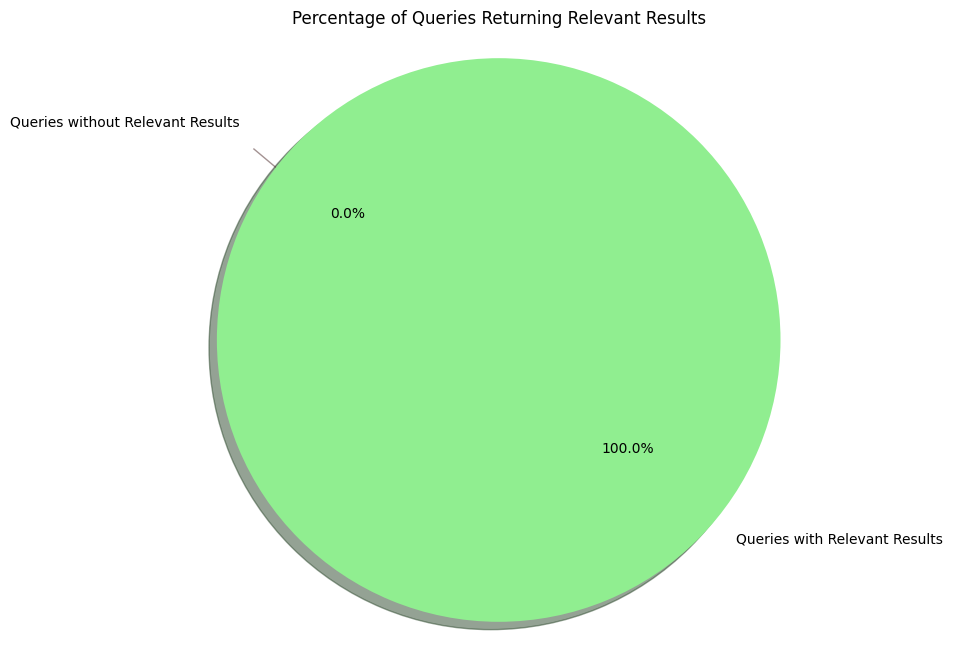

In [ ]:
# @title RAG Performance: Percentage of Relevant Results per Query - 3.2

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'complete_data' is already loaded
# If not, uncomment and modify the following line to load your dataset
# complete_data = pd.read_csv('/path/to/complete_dataset_scored.csv')

# Identify unique queries
unique_queries = complete_data['Query'].unique()

# Initialize a counter for queries that returned relevant results
queries_with_relevant_results = 0

# Check if each query returned at least one relevant result
for query in unique_queries:
    query_data = complete_data[complete_data['Query'] == query]
    if query_data['Scored_Relevance'].sum() > 0:
        queries_with_relevant_results += 1

# Calculate the percentage of queries with relevant results
total_queries = len(unique_queries)
relevant_query_percentage = (queries_with_relevant_results / total_queries) * 100

# Prepare data for the chart
labels = ['Queries with Relevant Results', 'Queries without Relevant Results']
sizes = [relevant_query_percentage, 100 - relevant_query_percentage]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Queries with Relevant Results')

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Percentage of Queries Returning Relevant Results')
plt.show()


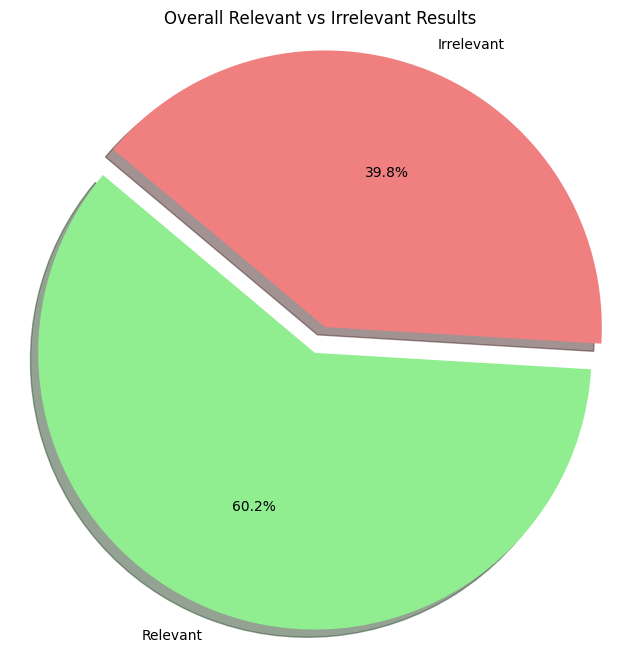

In [ ]:
# @title RAG Performance: Relevant vs Irrelevant Results - 3.3

# Calculate the performance of each model for finding relevant results
bm25_relevant_performance = ((complete_data['BM25 Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum() / complete_data['BM25 Score'].notna().sum() * 100
semantic_relevant_performance = ((complete_data['Semantic Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum() / complete_data['Semantic Score'].notna().sum() * 100
colbert_relevant_performance = ((complete_data['ColBERT Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum() / complete_data['ColBERT Score'].notna().sum() * 100

# Calculate the number of irrelevant results for each model
bm25_irrelevant = complete_data['BM25 Score'].notna().sum() - ((complete_data['BM25 Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum()
semantic_irrelevant = complete_data['Semantic Score'].notna().sum() - ((complete_data['Semantic Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum()
colbert_irrelevant = complete_data['ColBERT Score'].notna().sum() - ((complete_data['ColBERT Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum()

# Calculate overall relevant and irrelevant counts
total_relevant = ((complete_data['BM25 Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum() + \
                 ((complete_data['Semantic Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum() + \
                 ((complete_data['ColBERT Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum()
total_irrelevant = len(complete_data) - total_relevant

labels = 'Relevant', 'Irrelevant'
sizes = [total_relevant, total_irrelevant]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Relevant')

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Overall Relevant vs Irrelevant Results')
plt.show()

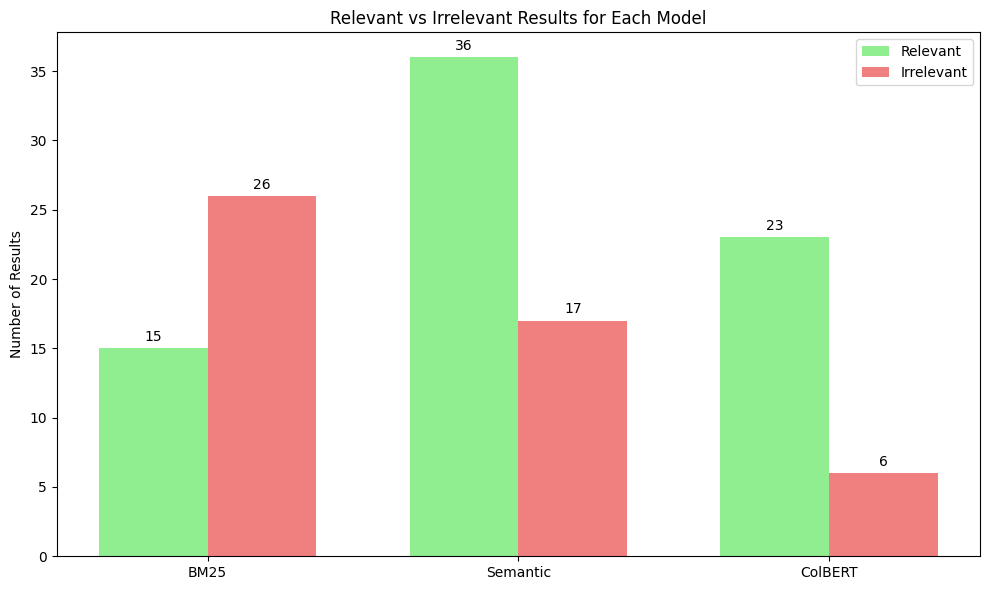

In [ ]:
# @title RAG Performance: Relevancy by Model - 3.4

import numpy as np

# Calculate the number of relevant results for each model
bm25_relevant = ((complete_data['BM25 Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum()
semantic_relevant = ((complete_data['Semantic Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum()
colbert_relevant = ((complete_data['ColBERT Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum()

# Calculate the number of irrelevant results for each model
bm25_irrelevant = complete_data['BM25 Score'].notna().sum() - bm25_relevant
semantic_irrelevant = complete_data['Semantic Score'].notna().sum() - semantic_relevant
colbert_irrelevant = complete_data['ColBERT Score'].notna().sum() - colbert_relevant


# Data preparation
labels = ['BM25', 'Semantic', 'ColBERT']
relevant_counts = np.array([bm25_relevant, semantic_relevant, colbert_relevant])
irrelevant_counts = np.array([bm25_irrelevant, semantic_irrelevant, colbert_irrelevant])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, relevant_counts, width, label='Relevant', color='lightgreen')
rects2 = ax.bar(x + width/2, irrelevant_counts, width, label='Irrelevant', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Results')
ax.set_title('Relevant vs Irrelevant Results for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add bar labels
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

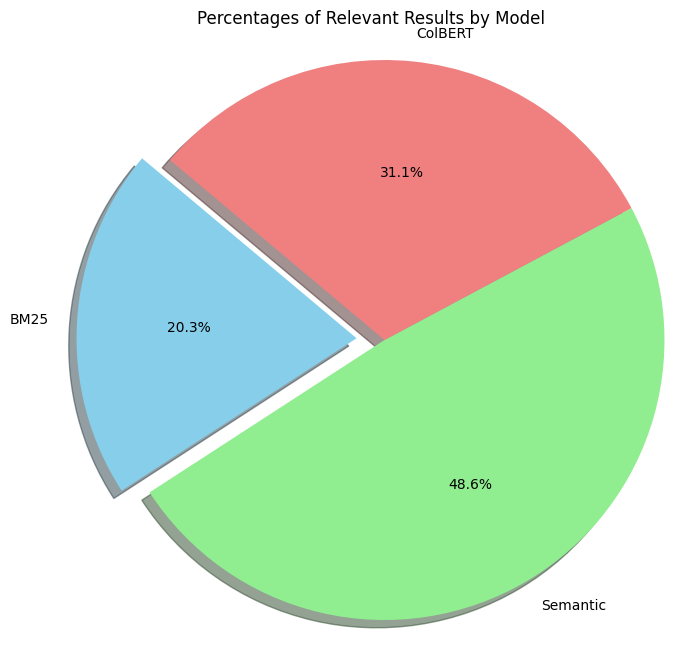

In [ ]:
# @title RAG Performance: Relevant Results by Model - 3.5

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'complete_data' is already loaded
# If not, uncomment and modify the following line to load your dataset
# complete_data = pd.read_csv('/path/to/complete_dataset_scored.csv')

# Calculate the number of relevant results for each model
bm25_relevant = ((complete_data['BM25 Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum()
semantic_relevant = ((complete_data['Semantic Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum()
colbert_relevant = ((complete_data['ColBERT Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum()

# Calculate the total number of relevant results
total_relevant = bm25_relevant + semantic_relevant + colbert_relevant

# Calculate the percentages of relevant results by model
bm25_relevant_percentage = (bm25_relevant / total_relevant) * 100
semantic_relevant_percentage = (semantic_relevant / total_relevant) * 100
colbert_relevant_percentage = (colbert_relevant / total_relevant) * 100

# Prepare the data for the pie chart
labels = ['BM25', 'Semantic', 'ColBERT']
sizes = [bm25_relevant_percentage, semantic_relevant_percentage, colbert_relevant_percentage]
colors = ['skyblue', 'lightgreen', 'lightcoral']
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'BM25')

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Percentages of Relevant Results by Model')
plt.show()


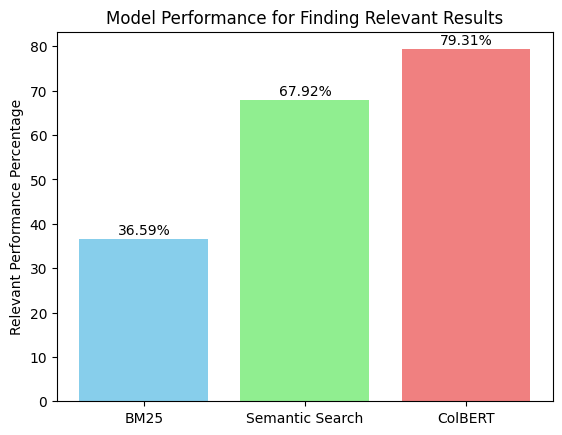

In [ ]:
# @title RAG Performance: Model Performance on Relevant Results - 3.6

# Recalculate the model performance scores based on the revised understanding of determining relevance
bm25_relevant_performance = ((complete_data['BM25 Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum() / complete_data['BM25 Score'].notna().sum() * 100
semantic_relevant_performance = ((complete_data['Semantic Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum() / complete_data['Semantic Score'].notna().sum() * 100
colbert_relevant_performance = ((complete_data['ColBERT Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum() / complete_data['ColBERT Score'].notna().sum() * 100

# Recalculate overall relevant performance
overall_relevant_performance = ((complete_data['BM25 Score'].notna() | complete_data['Semantic Score'].notna() | complete_data['ColBERT Score'].notna()) & (complete_data['Mistral Output'].str.contains("Relevant"))).sum() / len(complete_data) * 100

model_performance = {
    "BM25": bm25_relevant_performance,
    "Semantic Search": semantic_relevant_performance,
    "ColBERT": colbert_relevant_performance
    }

# Plotting the model performance
fig, ax = plt.subplots()
ax.bar(model_performance.keys(), model_performance.values(), color=['skyblue', 'lightgreen', 'lightcoral', 'lightblue'])
ax.set_ylabel('Relevant Performance Percentage')
ax.set_title('Model Performance for Finding Relevant Results')
for i, v in enumerate(model_performance.values()):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center')

# Display the plot
plt.show()

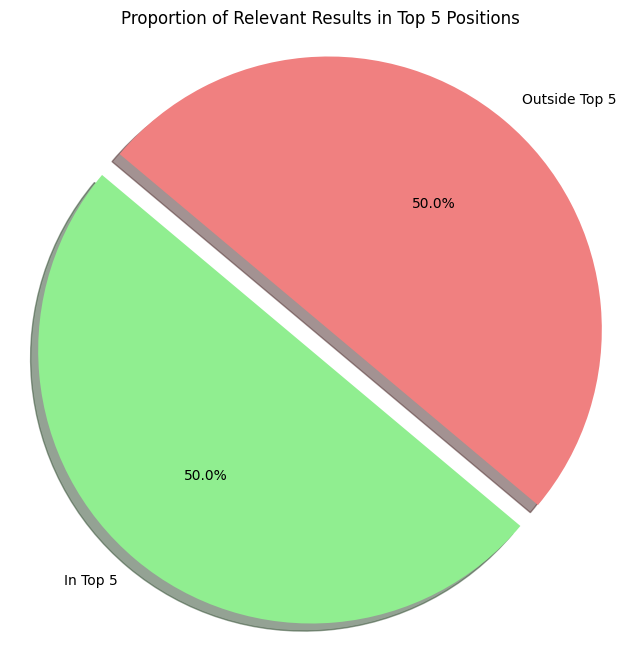

In [ ]:
# @title RAG Performance: Relevant Results by Position - 3.7

import matplotlib.pyplot as plt

# Filter relevant results
relevant_results = complete_data[complete_data['Scored_Relevance'] == 1]

# Extract relevant results and their reranking positions
relevant_positions = relevant_results['reranking_rank']

# Calculate the percentage of relevant results in top 5 positions
top_5_relevant = relevant_positions[relevant_positions <= 5].count()
total_relevant = relevant_positions.count()
percentage_top_5 = (top_5_relevant / total_relevant) * 100

# Calculate the counts for relevant results in and out of top 5 positions
in_top_5 = top_5_relevant
out_of_top_5 = total_relevant - top_5_relevant

# Pie chart for relevant results in top 5 positions vs. outside top 5
labels = ['In Top 5', 'Outside Top 5']
sizes = [in_top_5, out_of_top_5]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'In Top 5')

fig2, ax2 = plt.subplots(figsize=(8, 8))
ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Proportion of Relevant Results in Top 5 Positions')
plt.show()


## Methodology: Scoring RAG Results with LLMs - 3.8

<details>
  <summary>Methodology Scoring RAG Results with a LLM </summary>

  To provide a baseline for RAG pipeline's performance, the results of the relevance determination task (Section 2.6) were scored by GPT-4 for accuracy. Here is the structure of the Mistral outputs for this task:

> Query: How did Lincoln justify the Civil War in his speeches?

> Document ID: Text #: 79

> Key Quote: With high hope for the future....

> Source: Second Inaugural Address. March 4, 1865.

> Total Relevance Score: 75%

1. Document Relevance: Relevant
2. Quote Extraction: "Both parties deprecated war; but one of them would make war rather than let the nation survive....
3. Contextual Relevance:  In his Second Inaugural Address, Lincoln justified the Civil War as an unavoidable conflict....

> Query: How did Irish-Americans fare during the Civil War?

> Document ID: Text #: 74

> Key Quote: There were disbursed, for the civil service, $27,505,599,46...

> Source: Fourth Annual Message. December 6, 1864.

> Total Relevance Score: 82%

1. Document Relevance: Irrelevant
2. Quote Extraction: NaN
3. Contextual Relevance:  NaN

To evaluate the Mistral's ability to determine relevance, extract quotes, and provide contextual relevance we tested its responses against GPT-4 using [this notebook.](https://github.com/Dr-Hutchinson/programming_historian/blob/main/evaluation/relevance_task/Evaluation_Notebook.ipynb) When prompted, GPT-4 scores each section of Mistral's output in each category: "1" for agreement with Mistral or "0" for disagreement, in the following manner:

Example Score for GPT-4's total agreement with Mistral:

{
  "Relevance": 1,
  "Quote Extraction": 1,
  "Contextual Relevance": 1
}

Example Score for GPT-4's total disagreement with Mistral:

{
  "Relevance": 0,
  "Quote Extraction": 0,
  "Contextual Relevance": 0
}


Example Score for GPT-4's partial agreement with Mistral:

{
  "Relevance": 1,
  "Quote Extraction": 0,
  "Contextual Relevance": 0
}


Overall, GPT-4 reported strikingly strong agreement (95%) with Mistral's assessment of relvance, and lesser agreement for outputs for the other two categories. (Section 3.9). GPT-4's performance on this prompt was further tested against Anthropic's [Claude 3.5 Sonnet](https://www.anthropic.com/news/claude-3-5-sonnet) and Cohere's [Command-R+](https://docs.cohere.com/docs/command-r-plus) models (Section 3.10). Claude found similarly strong agteement with Mistral's relevance determinations; Command-R+ also found agreement, albeit to a lesser extent. While LLMs are imperfect judges for this task and may introduce errors, overall advanced LLMs have demonstrated strong performance on tasks for determining textual relevance. While imperfect, their relative cost and speed have resulted in LLM becoming increasingly popular for automating evaluation tasks such as this.  

Below are the results for agreement between the models of these three tasks:

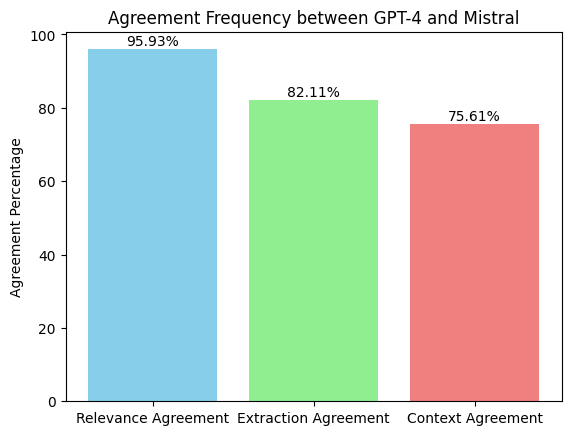

In [ ]:
# @title RAG Performance: Agreement between Mistral & GPT-4 on Relevance Task - 3.9

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate agreement frequency between GPT-4 and Mistral's outputs for the three categories
agreement_relevance = complete_data['Scored_Relevance'].mean() * 100
agreement_extraction = complete_data['Scored_Extraction'].mean() * 100
agreement_context = complete_data['Scored_Context'].mean() * 100

# Prepare the results
agreement_frequencies = {
    "Relevance Agreement": agreement_relevance,
    "Extraction Agreement": agreement_extraction,
    "Context Agreement": agreement_context,
}

# Agreement Frequency Visualization
fig, ax = plt.subplots()
ax.bar(agreement_frequencies.keys(), agreement_frequencies.values(), color=['skyblue', 'lightgreen', 'lightcoral'])
ax.set_ylabel('Agreement Percentage')
ax.set_title('Agreement Frequency between GPT-4 and Mistral')
for i, v in enumerate(agreement_frequencies.values()):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center')

# Display the plot
plt.show()

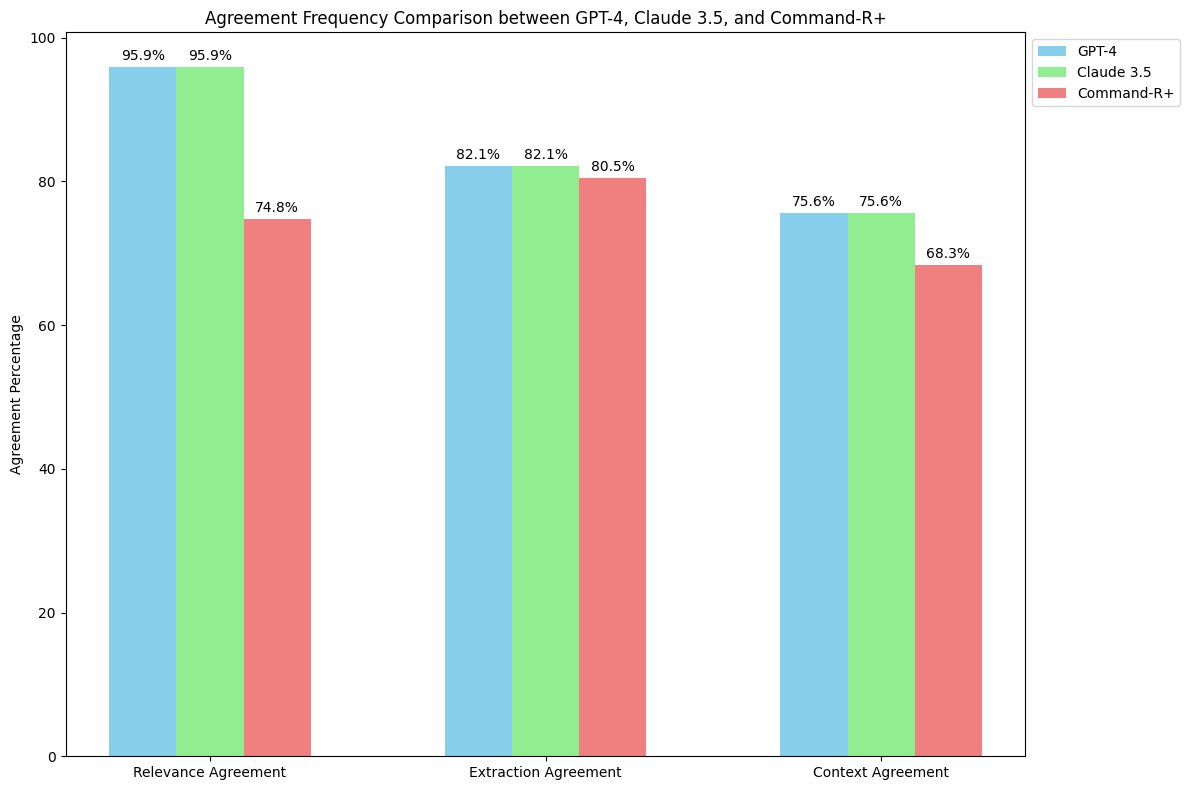

In [ ]:
# @title RAG Performance: Overall LLM Agreement with Mistral on Relevance Task  - 3.10

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'complete_data_gpt4', 'complete_data_claude', and 'complete_data_commandr' are already loaded

# Calculate agreement rates for each model

def calculate_agreement_rates(data):
    relevance_agreement = data['Scored_Relevance'].mean() * 100
    extraction_agreement = data['Scored_Extraction'].mean() * 100
    context_agreement = data['Scored_Context'].mean() * 100
    return relevance_agreement, extraction_agreement, context_agreement

# Agreement rates for GPT-4
agreement_relevance_gpt4, agreement_extraction_gpt4, agreement_context_gpt4 = calculate_agreement_rates(complete_data)
agreement_frequencies_gpt4 = {
    "Relevance Agreement": agreement_relevance_gpt4,
    "Extraction Agreement": agreement_extraction_gpt4,
    "Context Agreement": agreement_context_gpt4,
}

# Agreement rates for Claude 3.5
agreement_relevance_claude, agreement_extraction_claude, agreement_context_claude = calculate_agreement_rates(complete_data_claude)
agreement_frequencies_claude = {
    "Relevance Agreement": agreement_relevance_claude,
    "Extraction Agreement": agreement_extraction_claude,
    "Context Agreement": agreement_context_claude,
}

# Agreement rates for Command-R+
agreement_relevance_commandr, agreement_extraction_commandr, agreement_context_commandr = calculate_agreement_rates(complete_data_commandr)
agreement_frequencies_commandr = {
    "Relevance Agreement": agreement_relevance_commandr,
    "Extraction Agreement": agreement_extraction_commandr,
    "Context Agreement": agreement_context_commandr,
}

# Visualize the different rates for the three models
labels = ['Relevance Agreement', 'Extraction Agreement', 'Context Agreement']
gpt4_values = list(agreement_frequencies_gpt4.values())
claude_values = list(agreement_frequencies_claude.values())
commandr_values = list(agreement_frequencies_commandr.values())

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, gpt4_values, width, label='GPT-4', color='skyblue')
rects2 = ax.bar(x, claude_values, width, label='Claude 3.5', color='lightgreen')
rects3 = ax.bar(x + width, commandr_values, width, label='Command-R+', color='lightcoral')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Agreement Percentage')
ax.set_title('Agreement Frequency Comparison between GPT-4, Claude 3.5, and Command-R+')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add bar labels with only one decimal place
for rect in rects1 + rects2 + rects3:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

fig.tight_layout()
plt.show()


## Evaluating RAG: Summaries - 3.11

<details>
  <summary>Evaluating RAG Summaries </summary>

  The previous metrics measured the performance of the RAG retriever in obtaining relevant search results. We now turn to the RAG summaries concluding our pipeline. Assessing these responses is less straightforward than the binary classification for determinng relevance. But we can make some observations in comparing Mistral's performance on benchmark queries with and without RAG results.
  
  While both responses demonstrate some understanding of Lincoln's era, the outputs are markedly different in terms of the style and accuracy of the information provided. Mistral's initial responses do attempt to contextualize the query in the broader context of the Civil War era, often with correct details. Yet the responses frequently contain direct quotations or factual assertions that simply don't withstand close scrutiny. Likewise, while the RAG-informed responses are more narrow in range (and in some cases possess analytical flaws), they are centered on sources drawn directly from the Lincoln speech corpus, enhancing their overall factuality. Future improvement of the RAG pipeline could focus on addding modules for rewriting summaries to include context and using methods to direct LLMs to review and self-correct errors in reasoning. These methods are discussed in the Advanced RAG section. (Section 4.0)

  The code below displays the results of Mistral's responses with and without RAG:

In [ ]:
# @title RAG Performance: Displaying Mistral's Responses with and without RAG - 3.12


# Define the repository path
repo_path = '/content/programming_historian/evaluation/relevance_task'

# Function to read text file content
def read_text_file(file_path):
    with open(file_path, 'r') as file:
        return file.read()

# Initialize dictionaries to store data
csv_files = [file for file in os.listdir(repo_path) if file.endswith('.csv')]
queries = {}
initial_answers = {}
rag_responses = {}

# Load CSV files
for csv_file in csv_files:
    if 'final_results_with_mistral_' in csv_file:
        df = pd.read_csv(os.path.join(repo_path, csv_file))
        query = df['Query'].iloc[0]  # Assumes all rows have the same query
        queries[csv_file] = query

        # Load corresponding initial answer and rag response
        initial_answer_file = csv_file.replace('final_results_with_mistral_', 'initial_answer_').replace('_scored.csv', '.txt')
        rag_response_file = csv_file.replace('final_results_with_mistral_', 'rag_response_').replace('_scored.csv', '.txt')

        if os.path.exists(os.path.join(repo_path, initial_answer_file)) and os.path.exists(os.path.join(repo_path, rag_response_file)):
            initial_answers[csv_file] = read_text_file(os.path.join(repo_path, initial_answer_file))
            rag_responses[csv_file] = read_text_file(os.path.join(repo_path, rag_response_file))

# Create a DataFrame to hold the data for display
data = {
    'Query': [],
    'Initial Answer': [],
    'RAG Response': []
}

for csv_file in queries:
    if csv_file in initial_answers and csv_file in rag_responses:
        data['Query'].append(queries[csv_file])
        data['Initial Answer'].append(initial_answers[csv_file].replace('\n', '<br>'))
        data['RAG Response'].append(rag_responses[csv_file].replace('\n', '<br>'))

df_visual = pd.DataFrame(data)

# Display the DataFrame in a readable table format
def display_table(df):
    html = df.to_html(escape=False, index=False)
    display(HTML(html))

# Call the display_table function
display_table(df_visual)


Query,Initial Answer,RAG Response
What did Lincoln's speeches reveal about his evolving stance on slavery and emancipation?,"Abraham Lincoln, the 16th President of the United States, is well-known for his role in preserving the Union and for his unwavering commitment to ending slavery. However, it's essential to understand that Lincoln's views on slavery and emancipation evolved over time, reflecting the political climate and the exigencies of the moment.Lincoln's earliest public statements on slavery were moderate and focused primarily on maintaining the Union. In his 1835 Illinois Black Laws speech, he argued against extending slavery into new territories but also expressed opposition to interfering with the institution where it already existed. This position was consistent with the Whig Party platform at the time.However, as tensions between the North and South grew, so too did Lincoln's opposition to slavery. In his 1845 debates with Stephen Douglas, he criticized the expansion of slavery and advocated for its containment within existing slave states. He believed that allowing new territories to decide their own fate through popular sovereignty would lead to an endless cycle of expansion and conflict.In the late 1850s, as the issue of slavery came to a head, Lincoln became increasingly vocal in his opposition. In his famous ""House Divided"" speech in 1858, he declared, ""A house divided against itself cannot stand."" Here, he warned that if we could not agree on the moral question of slavery, the country would eventually split apart.With the election of Lincoln in 1860, which many saw as a threat to slavery, seven southern states seceded from the Union. In response, Lincoln issued the Emancipation Proclamation on January 1, 1863. This executive order applied only to areas still in rebellion, excluding border states like Maryland, Missouri, Kentucky, and Delaware, where significant numbers of slaves lived but had not yet seceded. It was not until later, with the passage of the Thirteenth Amendment in 1865, that slavery was abolished throughout the entire nation.Throughout these years, Lincoln's speeches revealed his growing understanding of the immorality of slavery and his determination to end it. From his early calls for containing its spread to his ultimate decision to free the slaves, Lincoln's evolution on this issue mirrored the changing political landscape of the time.","Abraham Lincoln's speeches offer insight into his evolving stance on slavery and emancipation throughout his presidency. In his First Inaugural Address, Lincoln emphasized his commitment to preserving the existing state of affairs regarding slavery, stating, ""I have no purpose, directly or indirectly, to interfere with the institution of slavery in the States where it exists. I believe I have no lawful right to do so, and I have no inclination to do so"" (March 4, 1861).However, as the Civil War progressed, Lincoln's views on slavery began to shift. In his Third Annual Message, he highlighted the role of African Americans in the Union army and the positive impact of their enlistment on both the labor front and the morale of the Union cause. He noted that ""of those who were slaves at the beginning of the rebellion, full one hundred thousand are now in the United States military service"" (December 8, 1863).Lincoln's earlier opposition to slavery can be seen in his eulogy for Henry Clay, where he quoted Clay's belief that ""the negroes were to be excepted from the human race"" (July 6, 1852). In his Cooper Union Address, Lincoln acknowledged the limited role of the federal government in emancipation while emphasizing its ability to prevent the spread of slavery. He advocated for a gradual approach to addressing the issue, aiming for peaceful transition and replacement of enslaved labor with free labor (February 27, 1860).By the time of his Fourth Annual Message, Lincoln had issued the Emancipation Proclamation, and he reaffirmed his commitment to it

## Evaluating RAG Summaries with BLEU and ROUGE - 3.13

<details>
  <summary>Evaluating RAG Summaries with BLEU and ROUGE </summary>

Beyond subjective comparison with raw LLM results, there are other quantative metrics useful in determining the effectiveness of RAG summaries. Two methods commonly used are [BLEU](https://en.wikipedia.org/wiki/BLEU) (Bilingual Evaluation Understudy) and [ROUGE](https://en.wikipedia.org/wiki/ROUGE_(metric)) (Recall-Oriented Understudy for Gisting Evaluation). These measures gauge the degree of overlap between a machine-generated summary against a reference text, providing a measure of how well the generated summary captures the key information from the source material.

Among the strengths of these measures is their widespread adoption and relative ease of implementation. BLEU relies on calculating the n-gram (sequence of words) overlap between the generated text and the reference text. ROUGE, on the other hand, offers a more nuanced assessment by calculating several metrics, including ROUGE-1 (unigram overlap) and ROUGE-L (longest common subsequence length), which provides a more comprehensive picture of the summary's quality.

Yet for RAG applications, these measures do have some shortcomings. BLEU and ROUGE focus on word overlap, which does not always capture the semantic meaning or coherence of the text. They can also penalize summaries that are too short, which is problematic for RAG systems that by design integrate information from multiple relevant sources. In such scenarios, a concise summary that accurately captures the essential information from several sources may receive a lower score than a less comprehensive summary that closely resembles a single source.

Yet these measures can effectively illustrate a key consideration for RAG applications - the number of relevant results the system can effectively accomodate in a single query.  When designing a RAG application decisions must be made concerning how many results to process for analysis. Insufficient matches result in a paucity of information, but too many sources can be difficult for Mistral to effectively summarize. Memory constraints on local machines can also limit the number of results a LLM can effectively process. Accordingly, for RAG summaries there generally is a correlation between an increasing number of results and  diminishing scores for BLEU and ROUGE. Balancing the depth of a search can improve inference speed, performance, and the quality of the final summary. These scores can help us determine where to find that balance.

To visualize that possible balance, the code below calculates BLEU and ROUGE scores for each query and then correlates those scores with the number of relevant results retrieved by our RAG pipeline. (Section 3.14) Each query's RAG response is displayed along with the evidence that produced the result. The accompanying graphs then show the relative performance of each query on the two metrics, along with an indication of the number of relevant results for each match. A clear trend is observed here where the number of relevant matches results seems associated with overall performance on these measures. Based on this data, limiting the number of relevant results for RAG respones to the top five is probably optimal for both the quality of summaries as well as memory constraints.

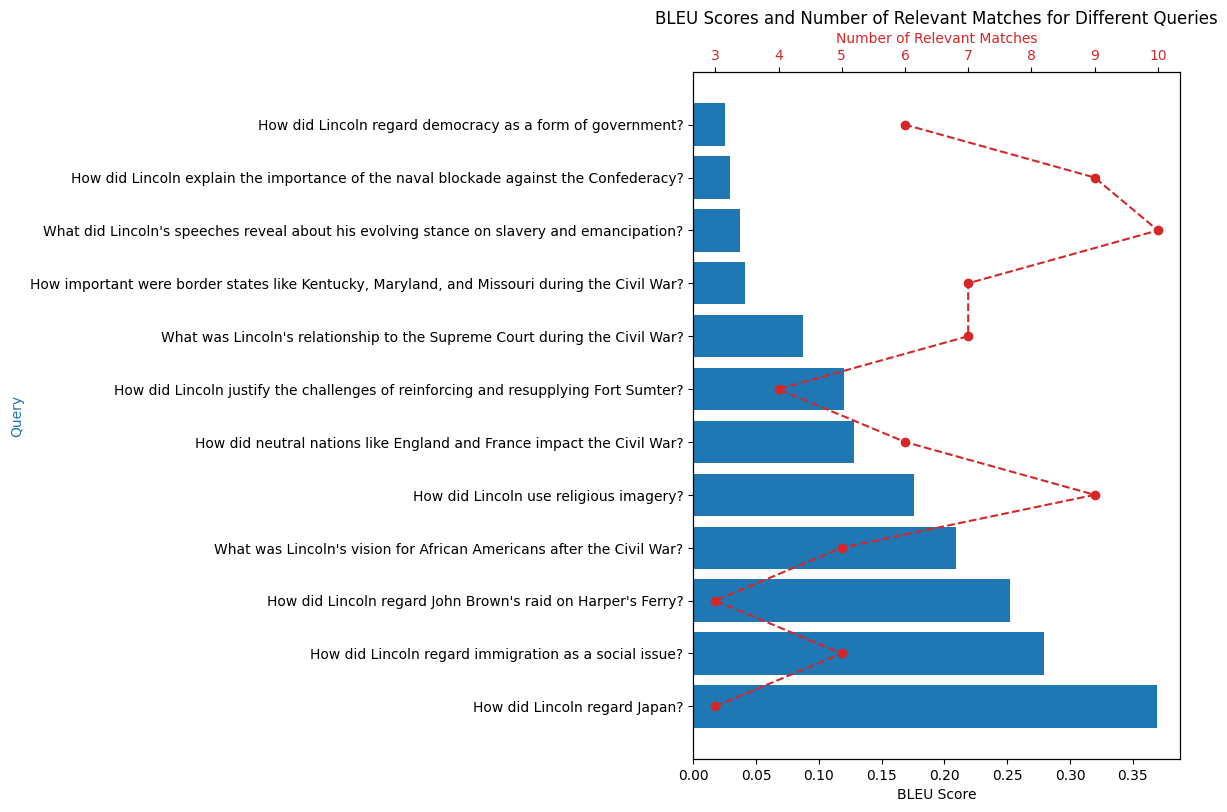

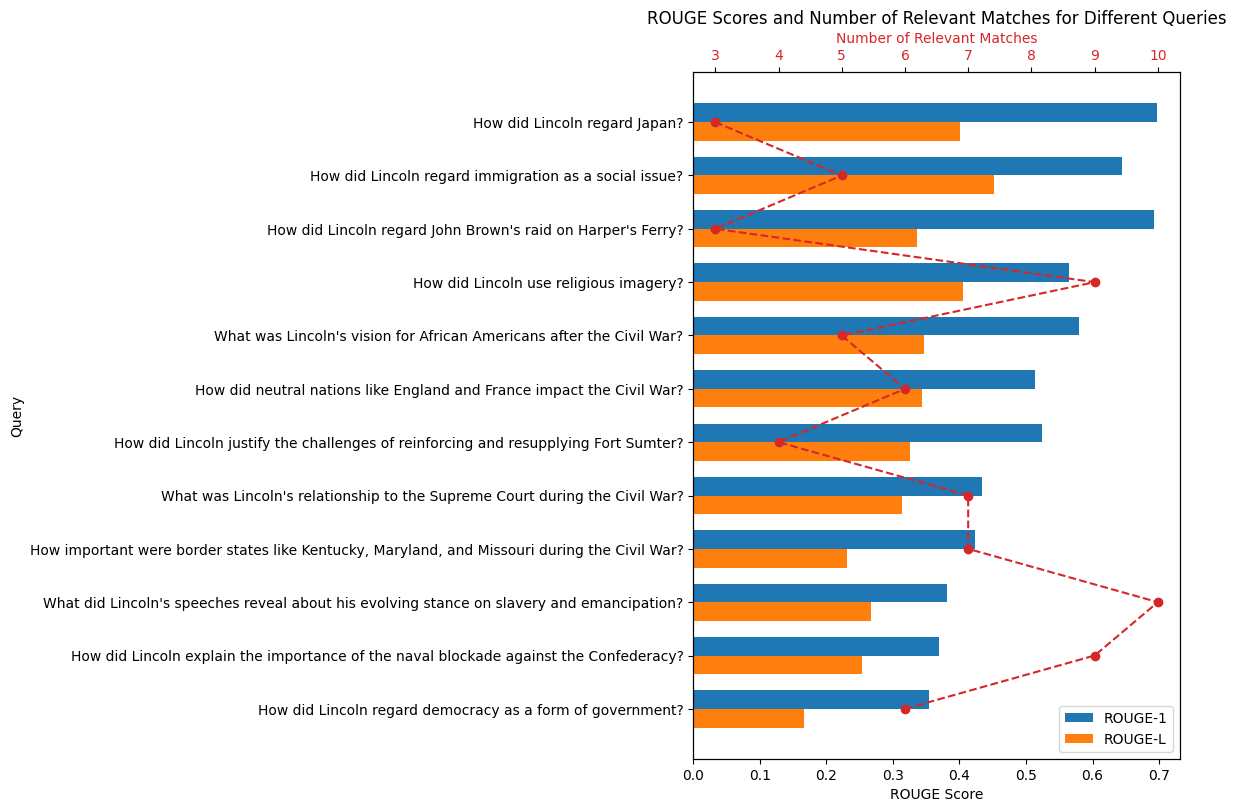

In [ ]:
# @title RAG Performance: Scoring RAG Responses with BLEU and ROUGE


import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import re
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/content/programming_historian/evaluation/relevance_task/complete_dataset_scored.csv')

# Function to extract and aggregate 'Quote Extraction', 'Contextual Relevance', 'Source', and 'Text ID' for each query
def aggregate_relevant_elements(df, query):
    relevant_df = df[(df['Query'] == query) & (df['Mistral Output'].str.contains('Relevant'))]
    sources_dict = {}

    # Extract 'Quote Extraction' and 'Contextual Relevance' from 'Mistral Output'
    for index, row in relevant_df.iterrows():
        quote_match = re.search(r'Quote Extraction: (.*?)\n', row['Mistral Output'])
        context_match = re.search(r'Contextual Relevance: (.*)', row['Mistral Output'])
        source = row['Source']
        text_id = row['Document ID']

        if source not in sources_dict:
            sources_dict[source] = {'quote_extractions': [], 'contextual_relevance': []}

        if quote_match:
            sources_dict[source]['quote_extractions'].append(f"{quote_match.group(1)} (Text ID: {text_id})")
        if context_match:
            sources_dict[source]['contextual_relevance'].append(f"{context_match.group(1)} (Text ID: {text_id})")

    return sources_dict, len(relevant_df)

# Function to calculate BLEU score
def calculate_bleu(reference, hypothesis):
    return sentence_bleu([reference.split()], hypothesis.split())

# Function to calculate ROUGE score
def calculate_rouge(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return scores['rouge1'].fmeasure, scores['rougeL'].fmeasure

query_files = {
    "How did Lincoln regard Japan?": "/content/programming_historian/evaluation/relevance_task/rag_response_japan.txt",
    "What was Lincoln's vision for African Americans after the Civil War?": "/content/programming_historian/evaluation/relevance_task/rag_response_african_american.txt",
    "How did Lincoln explain the importance of the naval blockade against the Confederacy?": "/content/programming_historian/evaluation/relevance_task/rag_response_blockade.txt",
    "How important were border states like Kentucky, Maryland, and Missouri during the Civil War?": "/content/programming_historian/evaluation/relevance_task/rag_response_border.txt",
    "How did Lincoln regard John Brown's raid on Harper's Ferry?": "/content/programming_historian/evaluation/relevance_task/rag_response_brown.txt",
    "What was Lincoln's relationship to the Supreme Court during the Civil War?": "/content/programming_historian/evaluation/relevance_task/rag_response_court.txt",
    "How did Lincoln regard democracy as a form of government?": "/content/programming_historian/evaluation/relevance_task/rag_response_democracy.txt",
    "What did Lincoln's speeches reveal about his evolving stance on slavery and emancipation?": "/content/programming_historian/evaluation/relevance_task/rag_response_evolving.txt",
    "How did Lincoln regard immigration as a social issue?": "/content/programming_historian/evaluation/relevance_task/rag_response_immigration.txt",
    "How did neutral nations like England and France impact the Civil War?": "/content/programming_historian/evaluation/relevance_task/rag_response_neutral.txt",
    "How did Lincoln use religious imagery?": "/content/programming_historian/evaluation/relevance_task/rag_response_religion.txt",
    "How did Lincoln justify the challenges of reinforcing and resupplying Fort Sumter?": "/content/programming_historian/evaluation/relevance_task/rag_response_sumter.txt",
}

# Process each query and calculate BLEU and ROUGE scores
bleu_scores = {}
rouge_scores = {}
relevant_counts = {}

html_content = """
<h2>BLEU and ROUGE Score Results</h2>
<style>
  details summary {
    cursor: pointer;
    font-weight: bold;
    margin-bottom: 10px;
  }
  details {
    margin-bottom: 10px;
  }
  ul {
    list-style-type: disc;
    margin-left: 20px;
  }
</style>
"""

for query, file_path in query_files.items():
    # Aggregate relevant elements for the query
    sources_dict, relevant_count = aggregate_relevant_elements(df, query)

    # Load the final RAG output for the query
    with open(file_path, 'r') as file:
        final_output = file.read().replace('\n', '<br>')

    # Combine all relevant data into a single string for BLEU and ROUGE calculation
    aggregated_relevant = ' '.join([' '.join(elements['quote_extractions'] + elements['contextual_relevance']) for elements in sources_dict.values()])

    # Calculate BLEU score
    bleu_score = calculate_bleu(aggregated_relevant, final_output)
    bleu_scores[query] = bleu_score

    # Calculate ROUGE score
    rouge1_score, rougeL_score = calculate_rouge(aggregated_relevant, final_output)
    rouge_scores[query] = (rouge1_score, rougeL_score)
    relevant_counts[query] = relevant_count

    # Format the relevant data as nested bullet points under each source
    relevant_data_html = ''
    for source, elements in sources_dict.items():
        quote_extractions_html = '<ul>' + ''.join(f'<li>{quote}</li>' for quote in elements['quote_extractions']) + '</ul>'
        contextual_relevance_html = '<ul>' + ''.join(f'<li>{context}</li>' for context in elements['contextual_relevance']) + '</ul>'
        relevant_data_html += f"<h4>{source}</h4><p><strong>Quote Extractions:</strong>{quote_extractions_html}<p><strong>Contextual Relevance:</strong>{contextual_relevance_html}</p>"

    # Format the result as collapsible HTML
    html_content += f"""
    <details>
      <summary>Query: {query}</summary>
      <p><strong>BLEU Score:</strong> {bleu_score:.4f}</p>
      <p><strong>ROUGE-1 Score:</strong> {rouge1_score:.4f}</p>
      <p><strong>ROUGE-L Score:</strong> {rougeL_score:.4f}</p>
      <p><strong>RAG Response:</strong><br>{final_output}</p>
      <p><strong>Relevant Data:</strong>{relevant_data_html}</p>
    </details>
    <hr>
    """

# Display the results using IPython display
display(HTML(html_content))

# Create DataFrames for visualization
bleu_scores_df = pd.DataFrame(sorted(bleu_scores.items(), key=lambda x: x[1], reverse=True), columns=['Query', 'BLEU Score'])
bleu_scores_df['Relevant Count'] = bleu_scores_df['Query'].map(relevant_counts)

rouge_scores_df = pd.DataFrame([(query, scores[0], scores[1], relevant_counts[query]) for query, scores in rouge_scores.items()],
                               columns=['Query', 'ROUGE-1 Score', 'ROUGE-L Score', 'Relevant Count'])

# Calculate the average ROUGE score to rank the queries
rouge_scores_df['Average ROUGE'] = (rouge_scores_df['ROUGE-1 Score'] + rouge_scores_df['ROUGE-L Score']) / 2

# Sort the DataFrame by the average ROUGE score
rouge_scores_df = rouge_scores_df.sort_values(by='Average ROUGE', ascending=False)

# Plotting the BLEU scores as a bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

color = 'tab:blue'
ax1.set_xlabel('BLEU Score')
ax1.set_ylabel('Query', color=color)
ax1.barh(bleu_scores_df['Query'], bleu_scores_df['BLEU Score'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twiny()
color = 'tab:red'
ax2.set_xlabel('Number of Relevant Matches', color=color)
ax2.plot(bleu_scores_df['Relevant Count'], bleu_scores_df['Query'], color=color, marker='o', linestyle='--')
ax2.tick_params(axis='x', labelcolor=color)

fig.tight_layout()
plt.title('BLEU Scores and Number of Relevant Matches for Different Queries')
plt.show()

# Plotting the ROUGE scores as a bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(rouge_scores_df))

color1 = 'tab:blue'
color2 = 'tab:orange'
ax1.set_xlabel('ROUGE Score')
ax1.set_ylabel('Query', color='black')
ax1.barh(index, rouge_scores_df['ROUGE-1 Score'], bar_width, color=color1, label='ROUGE-1')
ax1.barh(index + bar_width, rouge_scores_df['ROUGE-L Score'], bar_width, color=color2, label='ROUGE-L')
ax1.set_yticks(index + bar_width / 2)
ax1.set_yticklabels(rouge_scores_df['Query'])
ax1.invert_yaxis()
ax1.legend()

ax2 = ax1.twiny()
color = 'tab:red'
ax2.set_xlabel('Number of Relevant Matches', color=color)
ax2.plot(rouge_scores_df['Relevant Count'], index + bar_width / 2, color=color, marker='o', linestyle='--')
ax2.tick_params(axis='x', labelcolor=color)

fig.tight_layout()
plt.title('ROUGE Scores and Number of Relevant Matches for Different Queries')
plt.show()


There are other evaluation metrics that can be employed to examine the effeciveness of a RAG pipeline. Methods like [BERTScore](https://github.com/Tiiiger/bert_score) and specialized RAG evaluation approaches like [ARES](https://github.com/stanford-futuredata/ARES) and [RAGAS](https://github.com/explodinggradients/ragas) offer additional insights into the quality of RAG summaries, and how to improve them. Frameworks like [Langchain](https://docs.smith.langchain.com/old/cookbook/testing-examples) now offer a host of automated evaluation pipelines for a variety of performance areas. And of course, scholars should consider their own training and expertise in devising judgements of RAG's place in the historian's toolkit.



## Evaluating RAG as Historians - 3.14

<details>
  <summary>Evaluating RAG as Historians </summary>

While quantitative metrics like BLEU and ROUGE provide insights into a RAG pipeline's performance, they offer limited insight into this approach's potential for historical research. Indeed, historians require more than simple summaries or automated extracts of primary source collections. Our discipline demands critical assessment of sources, consideration of multiple perspectives, and the ability to contextualize the past.

RAG's true value lies in its potential to aid historians in these critical tasks. By programtically analyzing large datasets of historical documents in customizable ways, RAG can do more than just uncover sources that might have been missed with other methods. RAG can help us "cross-reference" vast amounts of information, develop new research questions and approaches, and leverage generative AI's potential in ways that promote verifiability and transparency.

Many historians may be skeptical of generative AI's potential to contribute to these ends. AI "hallucinations" distort the historical record, and LLM "analysis" of the past can go wildly wrong. Even in areas where they are well-informed, LLMs do not always demonstrate historical nuance. Take, for example, LLM interpretations of texts addressing Lincoln's evolving views on race and African American citizenship. These are complex and sensitive issues that demand a deep understanding of historical context and the ability to grapple with shifts in Lincoln's language and thought over time. RAG, when carefully implemented, can assist historians in navigating these complexities by providing access to primary sources and offering summaries that are informed by existing scholarship and feature histriographical nuance. But if poorly implemented, such frameworks can perpetuate misinformation and misunderstanding, especially if utilized without an understanding of AI's limitations.

Continuing advances in generative AI makes it difficult to predict the pace of improvement of these technologies. Yet however far these models advance, it is crucial to remember that RAG is not a replacement for the historian or for careful historical assessment. The summaries produced by RAG can be thought of as a first draft from an automated research tool, aiding the historian in identifying and contextualizing evidence. But in the end it is the historian who is responsible for evaluating sources, verifying factual accuracy, and interpreting historical events within a broader context.

The potential of these tools for historical research tool is certainly an area of active research; indeed, [historians](https://nicolay-honestabes-info.streamlit.app/), [archivists](https://chat.eluxemburgensia.lu/), and [librarians](https://lil.law.harvard.edu/blog/2024/02/12/warc-gpt-an-open-source-tool-for-exploring-web-archives-with-ai/) are already demonstrating how RAG can be leveraged to promote scholarship and extend access to our shared past. To see a state-of-the-art RAG pipeline at work, I highly encourage readers to try out [STORM](https://storm-project.stanford.edu/), which uses RAG techniques to generate Wikipedia-style articles based on user queries.

And as the technologies underpinning this approach evolves, we can expect to see continued advances in model performance. The emergence of multimodal RAG, for instance, allows search over multiple domains - text, image, sound, and video. This will allow researchers to integrate a whole new range of historical data in innovative ways. In embracing the possibilities of AI while remaining mindful of its limitations, historians of the future will increasingly find creative ways to transform raw data into the basis for meaningful dialogue about the past.

## Advanced RAG: For Further Exploration - 4.0

<details>
  <summary>Advanced RAG: For Further Exploration </summary>

  ![Survey of RAG Approaches](https://raw.githubusercontent.com/Dr-Hutchinson/programming_historian/main/media/RAG%20survey%20image.png)

  From: Gao et. al, "Retrieval-Augmented Generation for Large Language Models: A Survey." arXiv:2312.10997v4  [cs.CL]  5 Jan 2024. [https://arxiv.org/pdf/2312.10997](https://arxiv.org/pdf/2312.10997)


The evaluation of our RAG pipeline (Section 3.0) revealed several key areas that could benefit from further improvement. While our approach successfully retrieved relevant information, there is room for enhancing precision, particularly in the ranking of results and the overall performance of the keyword search. Furthermore, while Mistral-7B proved adept at determining the relevance of retrieved documents, it sometimes struggled to fully integrate those findings into comprehensive and nuanced summaries. Fortunately, advanced RAG techniques can address these limitations, and offer new approaches to enrich existing RAG pipelines.
  
**Model Finetuning:**

One way to enhance RAG's overall performance is through model fine-tuning. This process involves training RAG retrievers and LLMs on a specific dataset or adapting it to a particular task. In our case, fine-tuning Mistral-7B on a curated collection of RAG tasks tailored to Lincoln's speeches could improve the LLMs ability to understand Lincoln's language, historical context, and nuanced positions on complex issues like race and citizenship, thus grounding Mistral's outputs for historical analysis.

For example, the [*Nicolay* project](https://nicolay-honestabes-info.streamlit.app/RAG_with_Hay_&_Nicolay) (from which this article is based) has incorporated two fine-tuned LLMs as core components for both search and crafting RAG summaries, with notiecable improvements in performance. One task on which the models were finetuned is query rewriting, which greatly enhanced the effectiveness of keyword search, a weak area in our RAG pipeline. (This approach is described in greater detail below.) Improved reranking would also benefit our pipeline - as it happens, Cohere now offers a finetuning API endpoint for its Rerank model.

Please note that model finetuning can be an intensive process. To effectively finetune you need sets of curated question/answer pairs to train the model, much like the few-shot prompting method discussed earlier (Section 2.6). For example, in the *Nicolay* project the author used [finetuning sets](https://github.com/Dr-Hutchinson/nicolay/tree/main/data/finetuning_datasets) of fifty question/answer pairs for each finetuned model (one hundred examples in total) to train customized versions of OpenAI's GPT-3.5. Open-source models may require many more examples to achieve the same performance. (Thankfully, LLMs have proven useful in  generating these pairs, a process called generating synthetic data). Finetuning can also require substantial computing power if done locally. Using external finetuning services via APIs is a recommended alternative in terms of conviencence, time, and expense.

*   [Official documentation](https://docs.mistral.ai/guides/finetuning/) on finetuning Mistral LLM models with API (recommended)
*   [Notebook](https://github.com/bclavie/RAGatouille/blob/main/examples/03-finetuning_without_annotations_with_instructor_and_RAGatouille.ipynb) on how to generate synthetic data for finetuning ColBERT
*   [Official documentation](https://docs.cohere.com/docs/rerank-starting-the-training) on finetuning Cohere's Rerank model with API.


**Query Rewriting**

Another promising technique is query rewriting. By automatically reformulating the user's query in different ways, RAG can enchance the effectiveness of keyword search and increase the chances of retrieving relevant information.

For example, if a user asks "How did Lincoln defend of the Emancipation Proclamation?", a specialized model could rewrite the query using specific key terms likely to result in relevant results: "Emanciaption" and "Proclamation", but also "forever free" or other specific excerpts from the text. This could be done by a finetuned or prompted LLM. (*Nicolay* uses a fine-tuned model) This method can help capture a wider range of relevant documents, potentially improving both the recall and precision of methods like keyword search.

*   [Notebook](https://docs.llamaindex.ai/en/stable/examples/query_transformations/query_transform_cookbook/) on implementing query rewriting from Llamaindex
*   [Notebook](https://github.com/langchain-ai/langchain/blob/master/cookbook/rewrite.ipynb) on implementing query rewriting from Langchain
*   [Notebook](https://github.com/neuml/txtai/blob/master/examples/33_Query_translation.ipynb) on implementing query rewriting from txtai


**Self-Reflective RAG**

An interesting approach to addressing errors in RAG summaries is Self-RAG and Corrective RAG (CRAG). These approaches uses LLMs to iteratively parse and review RAG summaries to detect flaws in reasoning and confirm knowledge claims.

*   [Notebook](https://github.com/langchain-ai/langgraph/blob/main/examples/rag/langgraph_self_rag.ipynb?ref=blog.langchain.dev) on implementing Self-RAG with Langgraph
*   [Notebook](https://github.com/langchain-ai/langgraph/blob/main/examples/rag/langgraph_crag.ipynb) on implementing CRAG with Langgraph


**Prompt Finetuning**

This lesson explored prompt design approaches like [few-shot prompting](https://www.google.com/url?q=https%3A%2F%2Fwww.promptingguide.ai%2Ftechniques%2Ffewshot), or using crafted instructions and examples to guide LLM behavior. A promising new approach is prompt tuning. Unlike few-shot prompting, prompt tuning automates and optimizes the craft design process through machine learning techniques. The [DSPY framework](https://github.com/stanfordnlp/dspy?tab=readme-ov-file) offers powerful tools for fine-tuning prompts tailored to specific RAG tasks.

*  [Notebook](https://colab.research.google.com/github/stanfordnlp/dspy/blob/main/intro.ipynb) on getting started with DSPY.

**Multimodal RAG:**
  
The emergence of multimodal RAG, or search over multiple domains (text, image, sound, video) holds significant promise, allowing researchers to integrate visual and textual data in new and innovative ways. By embracing the possibilities of RAG while remaining mindful of its limitations, historians can unlock exciting new avenues for exploring the past.

*   Notebook for [Multimodal RAG using Vertex AI Gemini API (Google)](https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/retrieval-augmented-generation/intro_multimodal_rag.ipynb)
*   Notebook for [Multimodal RAG with Langchain and Redis](https://github.com/langchain-ai/langchain/tree/master/templates/rag-redis-multi-modal-multi-vector)

**Agentic RAG:**

Agentic RAG is a framework by which instead of an end-to-end pipeline, LLMs  autonomously orchestrate a plan of action and utilize tools to complete retrieval and analytical tasks. Such tools could include web search, optical character recognition, connecting to external databases, run code in programming environments, or numerous other approaches. For those interested in a vivid example of this approach, I highly encourage readers to explore [STORM](https://storm-project.stanford.edu/), an impressive agentic RAG that generates custom Wikipedia-style articles on subjects based on user prompts.

*   [ReACT](https://react-lm.github.io/): an approach for utilizing LLMs for agentic and tool-using behavior
*   [Langchain documentation](https://python.langchain.com/v0.1/docs/modules/agents/agent_types/react/) for setting up a ReACT-based agent
*   [Langgraph documentation](https://langchain-ai.github.io/langgraph/tutorials/rag/langgraph_agentic_rag/) for setting up agentic RAG









## Advanced RAG: For Further Reading - 4.1

<details>
  <summary>Advanced RAG: For Further Reading </summary>


  Below are additional resources for those wishing to learn more about RAG and other topics discussed in this article.

  **Overviews of RAG and RAG Techniques:**

  Gao et. al, "Retrieval-Augmented Generation for Large Language Models: A Survey." arXiv:2312.10997v4 [cs.CL] 5 Jan 2024. https://arxiv.org/pdf/2312.10997

  "Retrieval Augmented Generation (RAG) for LLMs." Prompt Engineering Guide. https://www.promptingguide.ai/research/rag
  
  Shi-Qi Yan, Jia-Chen Gu, Yun Zhu, Zhen-Hua Ling. "Corrective Retrieval Augmented Generation." arXiv:2401.15884v2  [cs.CL]  16 Feb 2024. https://arxiv.org/pdf/2401.15884

  "Self-Reflective RAG with LangGraph" Langchain Blog, 7 Feb 2024. https://blog.langchain.dev/agentic-rag-with-langgraph/


  **Lincoln's Views on Japan:**

  John Dower, "Yokohama Boomtown: Foreigners in Treaty Port Japan (1859-1872)" Visualizing Cultures (Massachusetts Institute of Technology, 2012). https://visualizingcultures.mit.edu/yokohama/pdf/yb_essay.pdf

  De-Min Tao, “‘A Standard of Thought and Action’: Lincoln’s Reception in East Asia.” Richard Carwardine and Jay Sexton, eds. *The Global Lincoln* (Oxford University Press, 2011): 223-241.
